In [3]:
import pandas as pd

# Load the Excel files
file1 = "DatasetTruth.xlsx"
file2 = "patient_data_cleaned.xlsx"
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# Combine the DataFrames vertically
combined_df = pd.concat([df1, df2], ignore_index=True)

# combined_df

In [4]:
# issue with ground truth label row 27 was shifted 1 element to the left need to shift to right
row_index = 27

# Extract the row values as a NumPy array
row_vals = combined_df.iloc[row_index].values.copy()
n_cols = len(row_vals)

# Create a new array for the modified row
new_row = row_vals.copy()

# Place the value from the last column into column 3 (Python index 2)
new_row[3] = row_vals[-1]

# Shift the original values from column 3 (index 2) through the second-to-last column one position to the right.
# They will now occupy indices 3 through n_cols-1.
new_row[4:] = row_vals[3:-1]

# Replace the row in the DataFrame with the modified row
combined_df.iloc[row_index] = new_row

# Verify the change by printing the modified row
combined_df.iloc[27]

Patient Note                                                                              BC27
Entire Patient Note                            Chief complaint: Patient with breast cancer ...
Current Medications                          acetaminophen (TYLENOL) 325 mg tablet Take 2 t...
Past Medications                                                                           NaN
Patient Current Age                                                         70-year-old female
Current Symptoms                             Feeling well since surgery, healing well, slig...
Past symptoms                                Left breast mass, numbness of L axilla and L e...
Chronic Conditions                           Arthritis, Breast cancer (left side), Cataract...
family history                               Paternal grandmother passed away from breast c...
Reason for visit                             Patient with a recent diagnosis of stage IIA p...
Primary diagnosis (should be only one)       Stage

In [5]:
import re

# Function to extract the numeric age from the string
def extract_age(age_str):
    if pd.isnull(age_str):
        return None
    # Extract the first group of digits from the age string
    match = re.search(r'(\d+)', str(age_str))
    return int(match.group(1)) if match else None

# Function to determine gender based on the 'age' and 'Reason for visit' columns
def determine_gender(age_str, reason_str):
    # Default to 'male'
    gender = "male"

    # Check the 'age' column first for keywords indicating female
    if pd.notnull(age_str):
        age_lower = str(age_str).lower()
        if "female" in age_lower or "woman" in age_lower:
            return "female"

    # Next, check the 'Reason for visit' column for gender-indicating words
    if pd.notnull(reason_str):
        reason_lower = str(reason_str).lower()
        # Look for tokens that might indicate a female
        if any(token in reason_lower for token in ["her", "woman", "she", "ms"]):
            return "female"
        # Optionally, you could check for "mr" to force male, but since default is male, it's not needed

    return gender

# Apply the functions to create new columns
combined_df['Age'] = combined_df['Patient Current Age'].apply(extract_age)
combined_df['Gender'] = combined_df.apply(lambda row: determine_gender(row['Patient Current Age'], row['Reason for visit']), axis=1)

# Display the first few rows to verify the changes
combined_df

,Patient Note,Entire Patient Note,Current Medications,Past Medications,Patient Current Age,Current Symptoms,Past symptoms,Chronic Conditions,family history,Reason for visit,Primary diagnosis (should be only one),Procedure names,Information relevant to primary diagnosis,Age,Gender
0,pdac0,SUBJECTIVE: This is a very pleasant 47-year...,none,Gemcitabine\nAbraxane,47-year-old,"Intermittent abdominal discomfort, usually at ...","Several months of vague abdominal discomfort, ...","Hypertension, voluntarily stopped his antihype...",There is no cancer among his first-degree rela...,He would like to meet with psycho oncology as ...,Locally advanced adenocarcinoma of the pancreas,CT scan ERCP with an EUS at ***** on October 2...,CT scan was done which revealed a pancreatic m...,47,male
1,pdac1,This is an independent visit ATTENDING: ***...,ALPRAZolam (XANAX) 0.25 mg tablet Take 1 table...,FOLFIRINOX\nGemcitabine + Abraxane,71 y.o.,Intermittent fevers for 4-5 days following tre...,Abdominal discomfort and biliary ductal obstru...,COPD (chronic obstructive pulmonary disease) (...,Father Pancreatic cancer\nMaternal Uncle Pancr...,Mr. ***** is a 71 y.o. male who returns to our...,Adenocarcinoma of the pancreas,ERCP and stent was placed\nWhipple for pancrea...,He presented with abdominal discomfort and bil...,71,male
2,pdac2,Mr. ***** is a 74 y.o. male who returns to our...,acetaminophen (TYLENOL ORAL) Take 200 mg by mo...,FOLFIRINOX\nFOLFOX\nGemcitabine plus nab-pacli...,74 y.o.,Tolerating POs adequately since stent placemen...,Progressive anorexia and fatigue\nMild thrombo...,Metastatic pancreatic cancer,"Comprehensive past medical, family, and social...",Mr. ***** is a 74 y.o. male who returns to our...,Metastatic pancreatic cancer,EGD (03/16/2019) notable for partial gastric o...,"He initially received 4 cycles of FOLFIRINOX, ...",74,male
3,pdac3,SUBJECTIVE: This is a very pleasant 64-year...,buPROPion (WELLBUTRIN SR) 100 mg 12 hr tablet ...,FOLFIRINOX\ngemcitabine and Abraxane,64-year-old,She does complain of brain fog which she attri...,She does complain of brain fog which she attri...,Metastatic adenocarcinoma of the pancreas,none,She’ll continue on surveillance and we will se...,Metastatic adenocarcinoma of the pancreas,EGD and ERCP\nCT Abdomen /Pelvis with Contrast...,She presented in June 2020 and was thought to ...,64,female
4,pdac4,This is an independent service. The available...,butenafine (LOTRIMIN ULTRA) 1 % cream\ncholeca...,FOLFIRINOX\nFOLFOX,53 y.o.,Continues to have some oral thrush,Presented with abdominal pain and weight loss,Stage IV pancreatic adenocarcinoma\nBiopsy-pro...,"Past medical, social, and family history were ...",Mr. ***** is a 53 y.o. male who returns to our...,Stage IV pancreatic adenocarcinoma,CT of the abdomen\nCT PET”\nEUS directed FNA o...,"On 01/10/2019, he had a CT of the abdomen whic...",53,male
5,pdac5,Subjective: This is a very pleasant 63-year...,none,modified FOLFIRINOX,63-year-old,continued abdominal discomfort particularly on...,"abdominal discomfort, bloating and eventually ...",Borderline resectable/locally advanced adenoca...,none,I’m very concerned about her imaging studies. ...,Borderline resectable/locally advanced adenoca...,metal stent was placed on May 29\nEUS done on ...,She presented in February with abdominal disco...,63,female
6,pdac6,SUBJECTIVE: This is a very pleasant 68-year...,bisacodyL (DULCOLAX) 5 mg EC tablet\ncholecalc...,gemcitabine and Abraxane,68-year-old,She has no cancer pain but takes oxycodone for...,symptoms of small bowel obstruction in early J...,Chronic opioid use\narthritis\nchronic back pa...,The only cancer in her family is in maternal a...,She is now had 4 full cycles and returns for C...,Adenocarcinoma the tail of the pancreas with l...,EUS was done but biopsy was not attempted\nCT ...,She was hospitalized and treated conservativel...,68,female
7,pdac7,Ms. ***** is a 69 y.o. female who comes to our...,acetaminophen (TYLENOL PO) take by mouth every...,"FOLFO

In [6]:
# A set to keep track of unique methods encountered.
unique_methods = set()

# List of known method options (all lower case). Add new options as encountered.
METHOD_OPTIONS = {
    "tablet", "patch", "capsule", "gel", "ointment", "suspension", "solution",
    "cream", "drops", "injection", "ec tablet", "topical ointment"
}

def process_medication_entry(entry):
    """
    Process a single medication string.
    Returns a dictionary with:
      - "drug": a list of names (the main name and alternative names if in parentheses)
      - "dosage": dosage string (if any)
      - "method": method string (if any)
    """
    # Clean the entry by removing parenthetical notes with dates or patient notes.
    # Remove any parenthetical parts that mention "reported" or "patient"
    entry = re.sub(r'\(.*?(reported|patient).*?\)', '', entry, flags=re.IGNORECASE).strip()

    # Remove any prefix like "UNABLE TO FIND Med Name:"
    entry = entry.replace("UNABLE TO FIND Med Name:", "").strip()

    # If the cleaned entry is just "none" (case insensitive), return that.
    if entry.lower() == "none":
        return {"drug": ["none"], "dosage": None, "method": None}

    # Split the entry by whitespace
    tokens = entry.split()

    # Find first token that starts with a digit (assume that's where dosage info begins)
    dosage_index = None
    for i, token in enumerate(tokens):
        if re.match(r'^\d', token):
            dosage_index = i
            break

    if dosage_index is None:
        # No dosage found: assume the whole entry is the drug name.
        # Try to extract alternative names from any parentheses.
        drug_names = extract_drug_names(" ".join(tokens))
        return {"drug": drug_names, "dosage": None, "method": None}

    # The drug part is the tokens before the dosage starts.
    drug_part = " ".join(tokens[:dosage_index])
    drug_names = extract_drug_names(drug_part)

    # Now, consider tokens from dosage_index onward.
    dosage_and_rest = tokens[dosage_index:]

    # We try to identify the method from the end.
    # Check first if the last two tokens form a known method option:
    method = None
    if len(dosage_and_rest) >= 2:
        possible_method = " ".join(dosage_and_rest[-2:]).lower()
        if possible_method in METHOD_OPTIONS:
            method = possible_method
            dosage_tokens = dosage_and_rest[:-2]
        else:
            # Otherwise, check if the last token is in our options.
            possible_method = dosage_and_rest[-1].lower()
            if possible_method in METHOD_OPTIONS:
                method = possible_method
                dosage_tokens = dosage_and_rest[:-1]
            else:
                # If not recognized, assume the last token is still the method.
                method = possible_method
                dosage_tokens = dosage_and_rest[:-1]
    else:
        # Only one token remains: treat it as method.
        method = dosage_and_rest[-1].lower()
        dosage_tokens = dosage_and_rest[:-1]

    # Save the encountered method in our unique_methods set.
    unique_methods.add(method)

    dosage = " ".join(dosage_tokens).strip() if dosage_tokens else None

    return {"drug": drug_names, "dosage": dosage, "method": method}

def extract_drug_names(text):
    """
    Given a string representing the drug part, extract the main drug name and any alternative names
    contained in parentheses.
    Returns a list of drug names.
    """
    # Find all text inside parentheses.
    alt_names = re.findall(r'\((.*?)\)', text)
    # Remove the parentheses parts from the main text.
    main_name = re.sub(r'\(.*?\)', '', text).strip()
    # Clean up main name: remove trailing commas etc.
    main_name = main_name.rstrip(",")

    names = []
    if main_name:
        names.append(main_name)
    for name in alt_names:
        cleaned = name.strip()
        if cleaned:
            names.append(cleaned)
    return names

def process_medications_cell(cell_value):
    """
    Process a cell from a medications column.
    Each cell may contain multiple medication entries separated by newlines.
    Returns three lists: list of drug entries (each a list of names), list of dosages, list of methods.
    """
    if pd.isnull(cell_value):
        return {"drug": [], "dosage": [], "method": []}

    # Split by newline (assumes each line is one medication entry)
    entries = [entry.strip() for entry in str(cell_value).split('\n') if entry.strip()]
    drugs = []
    dosages = []
    methods = []

    for entry in entries:
        result = process_medication_entry(entry)
        drugs.append(result["drug"])
        dosages.append(result["dosage"])
        methods.append(result["method"])

    return {"drug": drugs, "dosage": dosages, "method": methods}

# Example usage on a list of medication entries (for testing):
test_entries = [
    "bisacodyL (DULCOLAX) 5 mg EC tablet",
    "cholecalciferol, vitamin D3, 1000 UNITS tablet",
    "cloNIDine (CATAPRES) 0.1 mg/24 hr patch",
    "cyanocobalamin, Vitamin B12, (VITAMIN B-12) 500 mcg tablet",
    "diclofenac (VOLTAREN) 1 % gel",
    "docusate sodium (COLACE) 100 mg capsule",
    "fexofenadine (ALLEGRA) 60 mg tablet",
    "fluocinonide (LIDEX) 0.05 % ointment",
    "LORazepam (ATIVAN) 1 mg tablet",
    "ondansetron (ZOFRAN) 8 mg tablet (Patient not taking: Reported on 12/07/2020)",
    "oxybutynin (DITROPAN XL) 5 mg 24 hr tablet",
    "oxyCODONE (OXY-IR) 5 mg capsule",
    "pantoprazole (PROTONIX) 40 mg EC tablet",
    "prochlorperazine (COMPAZINE) 10 mg tablet (Patient not taking: Reported on 12/07/2020)",
    "senna (SENOKOT) 8.6 mg tablet",
    "UNABLE TO FIND Med Name: Equi-Block topical ointment"
]

print("Testing individual entries:")
for entry in test_entries:
    result = process_medication_entry(entry)
    print(f"Entry: {entry}")
    print(f"Processed -> Drug: {result['drug']}, Dosage: {result['dosage']}, Method: {result['method']}\n")

print("Unique method options encountered:", unique_methods)


# Process the medications columns.
combined_df['current_meds_processed'] = combined_df['Current Medications'].apply(process_medications_cell)
combined_df['past_meds_processed'] = combined_df['Past Medications'].apply(process_medications_cell)

# If you want to expand these into separate columns, you might do something like:
# (This creates new columns: current_drug, current_dosage, current_method, etc.)
combined_df['current_drug'] = combined_df['current_meds_processed'].apply(lambda x: x['drug'])
combined_df['current_dosage'] = combined_df['current_meds_processed'].apply(lambda x: x['dosage'])
combined_df['current_method'] = combined_df['current_meds_processed'].apply(lambda x: x['method'])

combined_df['past_drug'] = combined_df['past_meds_processed'].apply(lambda x: x['drug'])
combined_df['past_dosage'] = combined_df['past_meds_processed'].apply(lambda x: x['dosage'])
combined_df['past_method'] = combined_df['past_meds_processed'].apply(lambda x: x['method'])

combined_df

Testing individual entries:
Entry: bisacodyL (DULCOLAX) 5 mg EC tablet
Processed -> Drug: ['bisacodyL', 'DULCOLAX'], Dosage: 5 mg, Method: ec tablet

Entry: cholecalciferol, vitamin D3, 1000 UNITS tablet
Processed -> Drug: ['cholecalciferol, vitamin D3'], Dosage: 1000 UNITS, Method: tablet

Entry: cloNIDine (CATAPRES) 0.1 mg/24 hr patch
Processed -> Drug: ['cloNIDine', 'CATAPRES'], Dosage: 0.1 mg/24 hr, Method: patch

Entry: cyanocobalamin, Vitamin B12, (VITAMIN B-12) 500 mcg tablet
Processed -> Drug: ['cyanocobalamin, Vitamin B12', 'VITAMIN B-12'], Dosage: 500 mcg, Method: tablet

Entry: diclofenac (VOLTAREN) 1 % gel
Processed -> Drug: ['diclofenac', 'VOLTAREN'], Dosage: 1 %, Method: gel

Entry: docusate sodium (COLACE) 100 mg capsule
Processed -> Drug: ['docusate sodium', 'COLACE'], Dosage: 100 mg, Method: capsule

Entry: fexofenadine (ALLEGRA) 60 mg tablet
Processed -> Drug: ['fexofenadine', 'ALLEGRA'], Dosage: 60 mg, Method: tablet

Entry: fluocinonide (LIDEX) 0.05 % ointment
Proce

,Patient Note,Entire Patient Note,Current Medications,Past Medications,Patient Current Age,Current Symptoms,Past symptoms,Chronic Conditions,family history,Reason for visit,...,Age,Gender,current_meds_processed,past_meds_processed,current_drug,current_dosage,current_method,past_drug,past_dosage,past_method
0,pdac0,SUBJECTIVE: This is a very pleasant 47-year...,none,Gemcitabine\nAbraxane,47-year-old,"Intermittent abdominal discomfort, usually at ...","Several months of vague abdominal discomfort, ...","Hypertension, voluntarily stopped his antihype...",There is no cancer among his first-degree rela...,He would like to meet with psycho oncology as ...,...,47,male,"{'drug': [['none']], 'dosage': [None], 'method...","{'drug': [['Gemcitabine'], ['Abraxane']], 'dos...",[[none]],[None],[None],"[[Gemcitabine], [Abraxane]]","[None, None]","[None, None]"
1,pdac1,This is an independent visit ATTENDING: ***...,ALPRAZolam (XANAX) 0.25 mg tablet Take 1 table...,FOLFIRINOX\nGemcitabine + Abraxane,71 y.o.,Intermittent fevers for 4-5 days following tre...,Abdominal discomfort and biliary ductal obstru...,COPD (chronic obstructive pulmonary disease) (...,Father Pancreatic cancer\nMaternal Uncle Pancr...,Mr. ***** is a 71 y.o. male who returns to our...,...,71,male,"{'drug': [['ALPRAZolam', 'XANAX'], ['atorvasta...","{'drug': [['FOLFIRINOX'], ['Gemcitabine + Abra...","[[ALPRAZolam, XANAX], [atorvastatin, LIPITOR],...",[0.25 mg tablet Take 1 tablet (0.25 mg total) ...,"[sleep., daily., pain, day., days, tpn/tf/npo,...","[[FOLFIRINOX], [Gemcitabine + Abraxane]]","[None, None]","[None, None]"
2,pdac2,Mr. ***** is a 74 y.o. male who returns to our...,acetaminophen (TYLENOL ORAL) Take 200 mg by mo...,FOLFIRINOX\nFOLFOX\nGemcitabine plus nab-pacli...,74 y.o.,Tolerating POs adequately since stent placemen...,Progressive anorexia and fatigue\nMild thrombo...,Metastatic pancreatic cancer,"Comprehensive past medical, family, and social...",Mr. ***** is a 74 y.o. male who returns to our...,...,74,male,"{'drug': [['acetaminophen Take', 'TYLENOL ORA...","{'drug': [['FOLFIRINOX'], ['FOLFOX'], ['Gemcit...","[[acetaminophen Take, TYLENOL ORAL], [aspirin...","[200 mg by mouth As, 81 mg EC tablet aspirin 8...","[needed., route., tablet, pain, needed., hours...","[[FOLFIRINOX], [FOLFOX], [Gemcitabine plus nab...","[None, None, None, 5-FU/LV plus nanoliposomal ...","[None, None, None, onivyde)]"
3,pdac3,SUBJECTIVE: This is a very pleasant 64-year...,buPROPion (WELLBUTRIN SR) 100 mg 12 hr tablet ...,FOLFIRINOX\ngemcitabine and Abraxane,64-year-old,She does complain of brain fog which she attri...,She does complain of brain fog which she attri...,Metastatic adenocarcinoma of the pancreas,none,She’ll continue on surveillance and we will se...,...,64,female,"{'drug': [['buPROPion', 'WELLBUTRIN SR'], ['es...","{'drug': [['FOLFIRINOX'], ['gemcitabine and Ab...","[[buPROPion, WELLBUTRIN SR], [estradiol twice ...","[100 mg 12 hr tablet Take 100 mg by mouth, 0.0...","[daily, patch, vomiting), given., breakfast, d...","[[FOLFIRINOX], [gemcitabine and Abraxane]]","[None, None]","[None, None]"
4,pdac4,This is an independent service. The available...,butenafine (LOTRIMIN ULTRA) 1 % cream\ncholeca...,FOLFIRINOX\nFOLFOX,53 y.o.,Continues to have some oral thrush,Presented with abdominal pain and weight loss,Stage IV pancreatic adenocarcinoma\nBiopsy-pro...,"Past medical, social, and family history were ...",Mr. ***** is a 53 y.o. male who returns to our...,...,53,male,"{'drug': [['butenafine', 'LOTRIMIN ULTRA'], ['...","{'drug': [['FOLFIRINOX'], ['FOLFOX']], 'dosage...","[[butenafine, LOTRIMIN ULTRA], [cholecalcifero...","[1 %, 1000 UNITS TAB tablet Take 4 tablets by ...","[cream, daily, treatment, stop., None, sola, N...","[[FOLFIRINOX], [FOLFOX]]","[None, None]","[None, None]"
5,pdac5,Subjective: This is a very pleasant 63-year...,none,modified FOLFIRINOX,63-year-old,continued abdominal discomfort particularly on...,"abdominal discomfort, bloating and eventually ...",Borderline

In [7]:
combined_df.columns = combined_df.columns.str.strip()
print("Columns in DataFrame:", combined_df.columns.tolist())

def process_list_cell(cell_value):
    """
    Process a cell that contains list-like text and return a list of items.
    Splits by newline and comma.
    """
    if pd.isnull(cell_value):
        return []

    # First, split by newline
    items = [item.strip() for item in str(cell_value).split('\n') if item.strip()]

    # Then, for each item, further split by comma if needed.
    final_items = []
    for item in items:
        if ',' in item:
            final_items.extend([sub_item.strip() for sub_item in item.split(',') if sub_item.strip()])
        else:
            final_items.append(item)

    return final_items

# Update these names if the actual columns differ
current_symptoms_col = "Current Symptoms"
past_symptoms_col = "Past symptoms"
chronic_conditions_col = "Chronic Conditions"
family_histry_col = "family history"


# Process the columns to create new list columns.
combined_df['current_symptoms_list'] = combined_df[current_symptoms_col].apply(process_list_cell)
combined_df['past_symptoms_list'] = combined_df[past_symptoms_col].apply(process_list_cell)
combined_df['chronic_conditions_list'] = combined_df[chronic_conditions_col].apply(process_list_cell)
combined_df['family_history_list'] = combined_df[family_histry_col].apply(process_list_cell)

# Display a few rows for verification
combined_df

Columns in DataFrame: ['Patient Note', 'Entire Patient Note', 'Current Medications', 'Past Medications', 'Patient Current Age', 'Current Symptoms', 'Past symptoms', 'Chronic Conditions', 'family history', 'Reason for visit', 'Primary diagnosis (should be only one)', 'Procedure names', 'Information relevant to primary diagnosis', 'Age', 'Gender', 'current_meds_processed', 'past_meds_processed', 'current_drug', 'current_dosage', 'current_method', 'past_drug', 'past_dosage', 'past_method']


,Patient Note,Entire Patient Note,Current Medications,Past Medications,Patient Current Age,Current Symptoms,Past symptoms,Chronic Conditions,family history,Reason for visit,...,current_drug,current_dosage,current_method,past_drug,past_dosage,past_method,current_symptoms_list,past_symptoms_list,chronic_conditions_list,family_history_list
0,pdac0,SUBJECTIVE: This is a very pleasant 47-year...,none,Gemcitabine\nAbraxane,47-year-old,"Intermittent abdominal discomfort, usually at ...","Several months of vague abdominal discomfort, ...","Hypertension, voluntarily stopped his antihype...",There is no cancer among his first-degree rela...,He would like to meet with psycho oncology as ...,...,[[none]],[None],[None],"[[Gemcitabine], [Abraxane]]","[None, None]","[None, None]","[Intermittent abdominal discomfort, usually at...","[Several months of vague abdominal discomfort,...","[Hypertension, voluntarily stopped his antihyp...",[There is no cancer among his first-degree rel...
1,pdac1,This is an independent visit ATTENDING: ***...,ALPRAZolam (XANAX) 0.25 mg tablet Take 1 table...,FOLFIRINOX\nGemcitabine + Abraxane,71 y.o.,Intermittent fevers for 4-5 days following tre...,Abdominal discomfort and biliary ductal obstru...,COPD (chronic obstructive pulmonary disease) (...,Father Pancreatic cancer\nMaternal Uncle Pancr...,Mr. ***** is a 71 y.o. male who returns to our...,...,"[[ALPRAZolam, XANAX], [atorvastatin, LIPITOR],...",[0.25 mg tablet Take 1 tablet (0.25 mg total) ...,"[sleep., daily., pain, day., days, tpn/tf/npo,...","[[FOLFIRINOX], [Gemcitabine + Abraxane]]","[None, None]","[None, None]",[Intermittent fevers for 4-5 days following tr...,[Abdominal discomfort and biliary ductal obstr...,[COPD (chronic obstructive pulmonary disease) ...,"[Father Pancreatic cancer, Maternal Uncle Panc..."
2,pdac2,Mr. ***** is a 74 y.o. male who returns to our...,acetaminophen (TYLENOL ORAL) Take 200 mg by mo...,FOLFIRINOX\nFOLFOX\nGemcitabine plus nab-pacli...,74 y.o.,Tolerating POs adequately since stent placemen...,Progressive anorexia and fatigue\nMild thrombo...,Metastatic pancreatic cancer,"Comprehensive past medical, family, and social...",Mr. ***** is a 74 y.o. male who returns to our...,...,"[[acetaminophen Take, TYLENOL ORAL], [aspirin...","[200 mg by mouth As, 81 mg EC tablet aspirin 8...","[needed., route., tablet, pain, needed., hours...","[[FOLFIRINOX], [FOLFOX], [Gemcitabine plus nab...","[None, None, None, 5-FU/LV plus nanoliposomal ...","[None, None, None, onivyde)]",[Tolerating POs adequately since stent placeme...,"[Progressive anorexia and fatigue, Mild thromb...",[Metastatic pancreatic cancer],"[Comprehensive past medical, family, and socia..."
3,pdac3,SUBJECTIVE: This is a very pleasant 64-year...,buPROPion (WELLBUTRIN SR) 100 mg 12 hr tablet ...,FOLFIRINOX\ngemcitabine and Abraxane,64-year-old,She does complain of brain fog which she attri...,She does complain of brain fog which she attri...,Metastatic adenocarcinoma of the pancreas,none,She’ll continue on surveillance and we will se...,...,"[[buPROPion, WELLBUTRIN SR], [estradiol twice ...","[100 mg 12 hr tablet Take 100 mg by mouth, 0.0...","[daily, patch, vomiting), given., breakfast, d...","[[FOLFIRINOX], [gemcitabine and Abraxane]]","[None, None]","[None, None]",[She does complain of brain fog which she attr...,[She does complain of brain fog which she attr...,[Metastatic adenocarcinoma of the pancreas],[none]
4,pdac4,This is an independent service. The available...,butenafine (LOTRIMIN ULTRA) 1 % cream\ncholeca...,FOLFIRINOX\nFOLFOX,53 y.o.,Continues to have some oral thrush,Presented with abdominal pain and weight loss,Stage IV pancreatic adenocarcinoma\nBiopsy-pro...,"Past medical, social, and family history were ...",Mr. ***** is a 53 y.o. male who returns to our...,...,"[[butenafine, LOTRIMIN ULTRA], [cholecalcifero...","[1 %, 1000 UNITS TAB tablet Take 4 tablets by ...","[cream, daily, treatment, stop., None, sola, N...","[[FOLFIRINOX], [FOLFOX]]","[None, None]","[Non

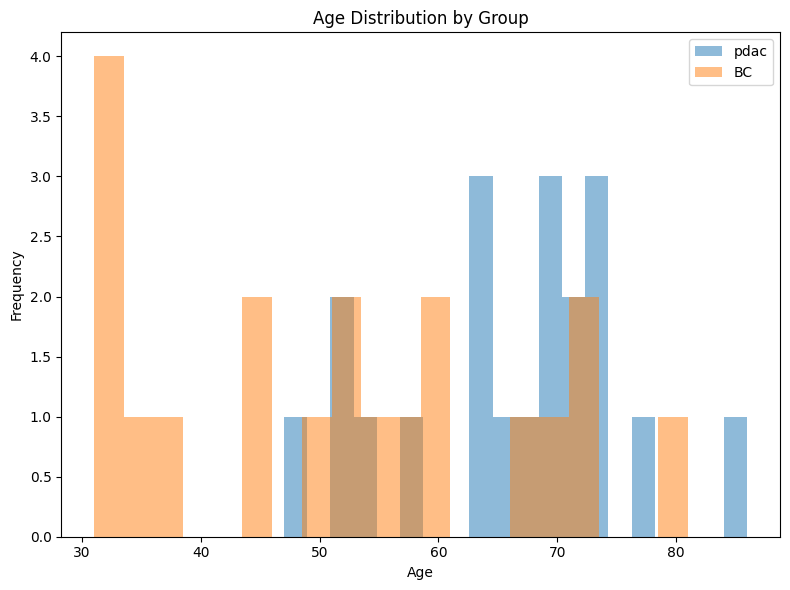

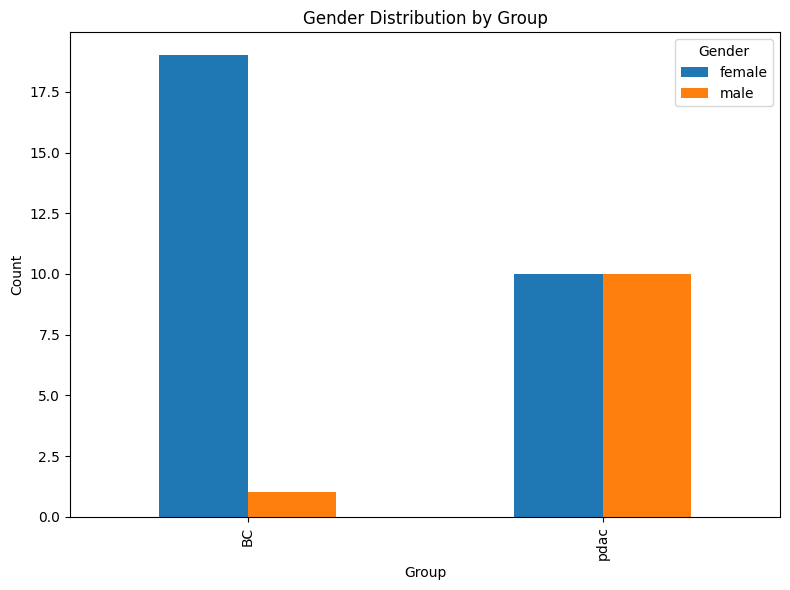

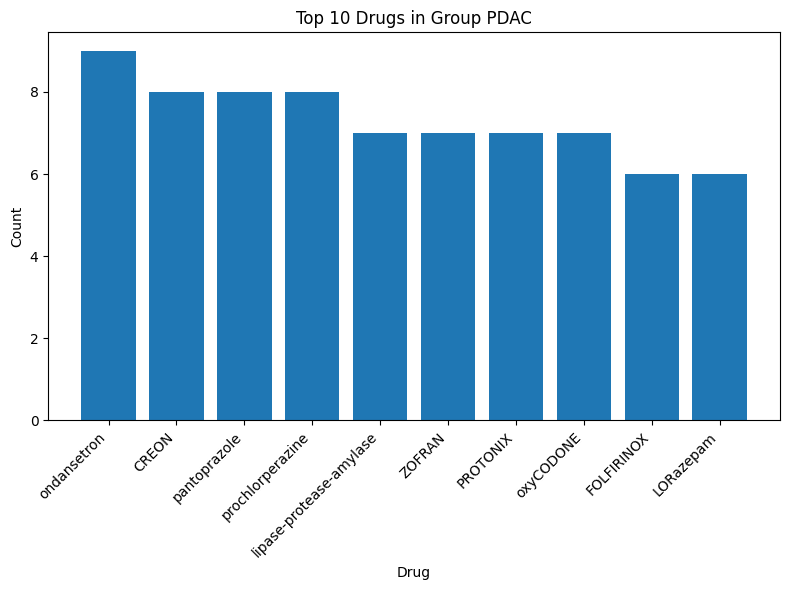

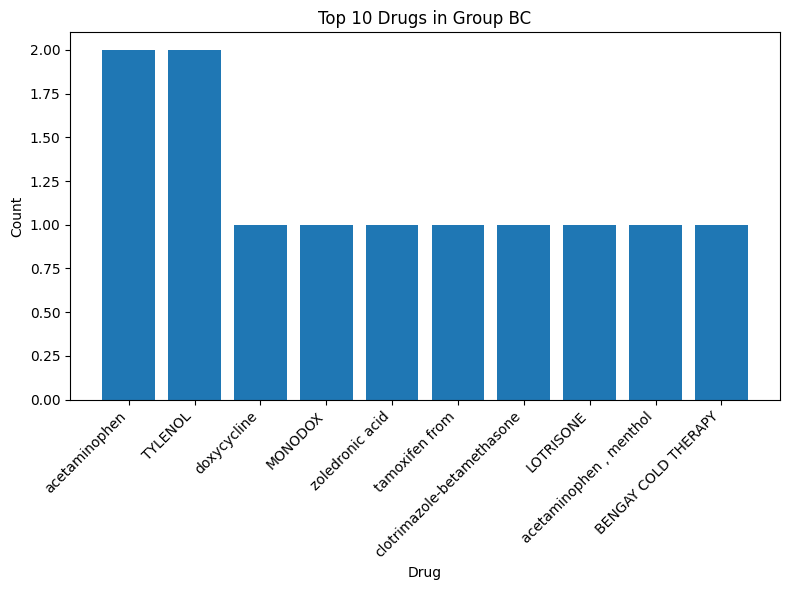

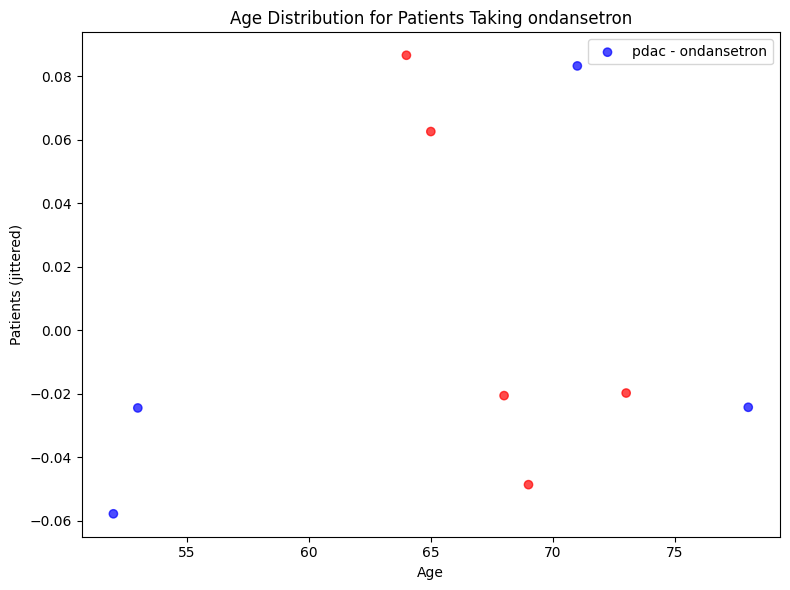

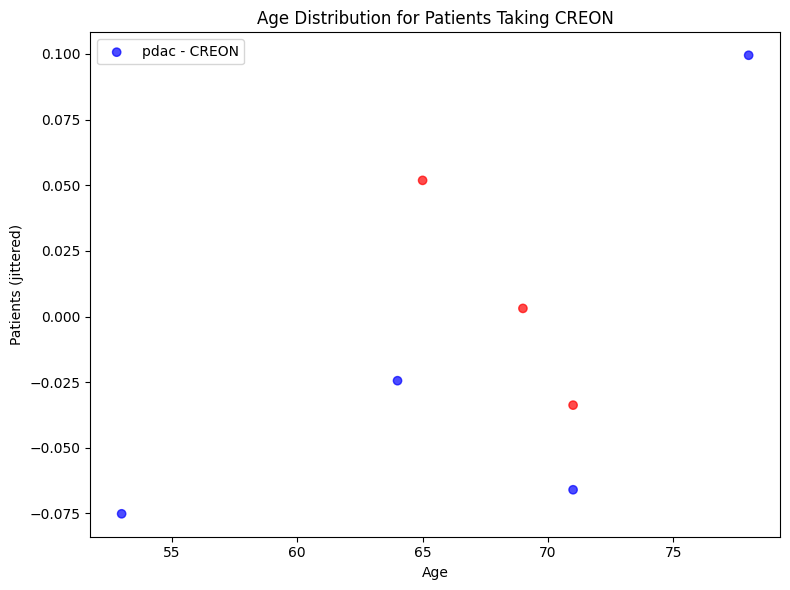

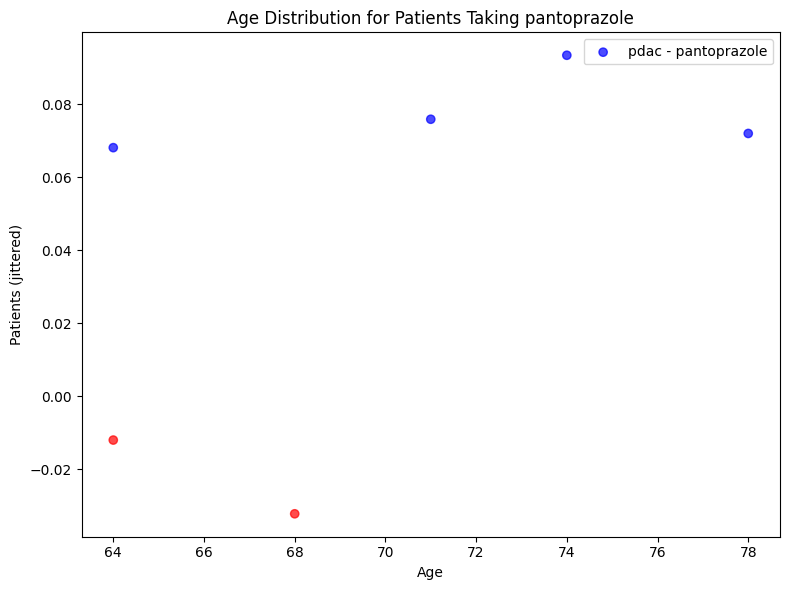

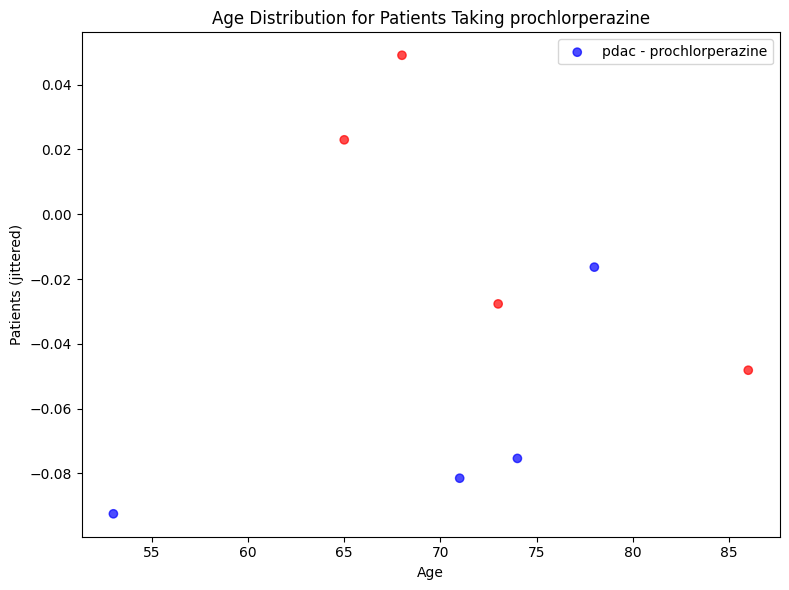

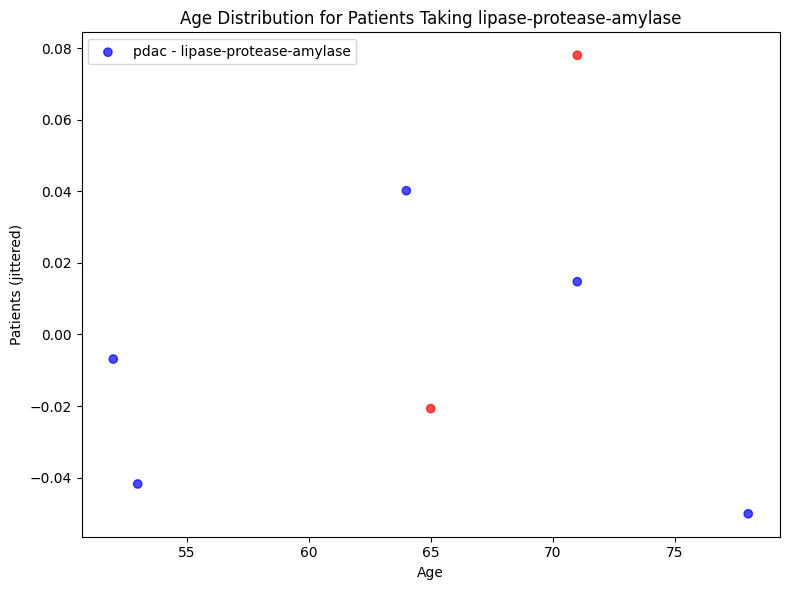

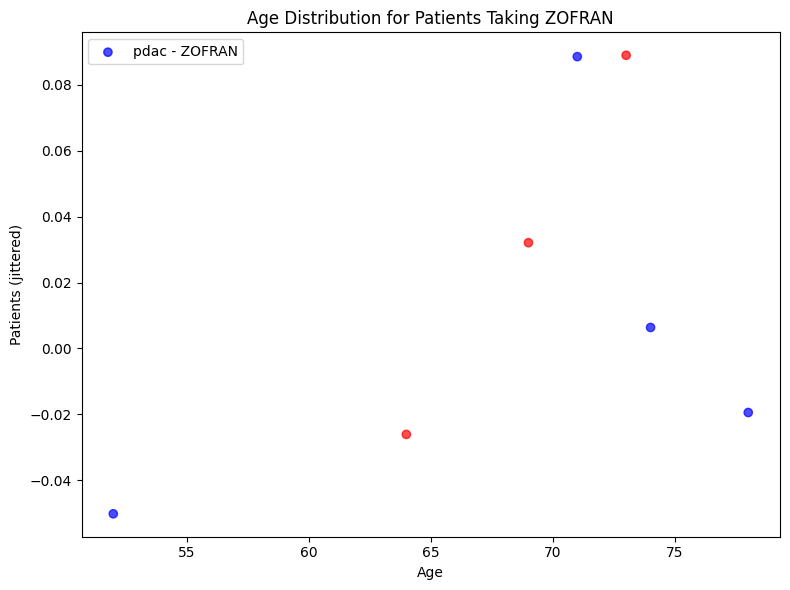

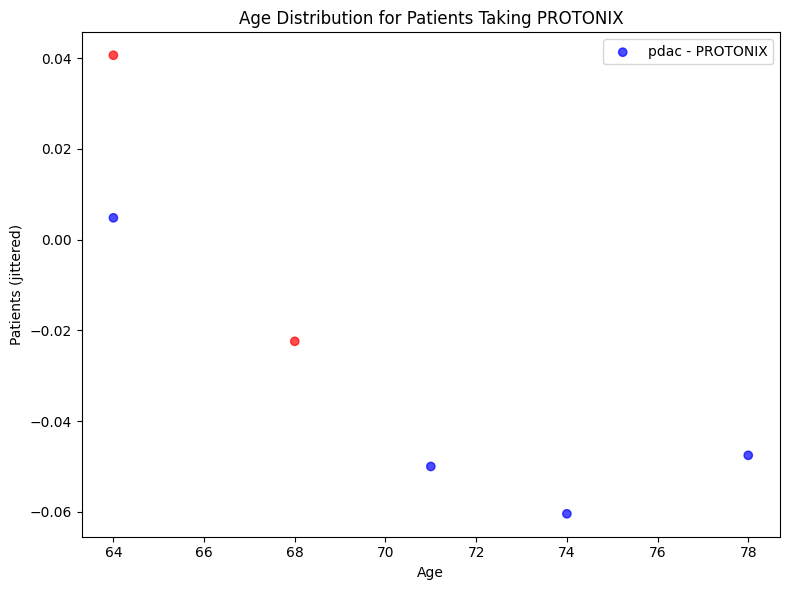

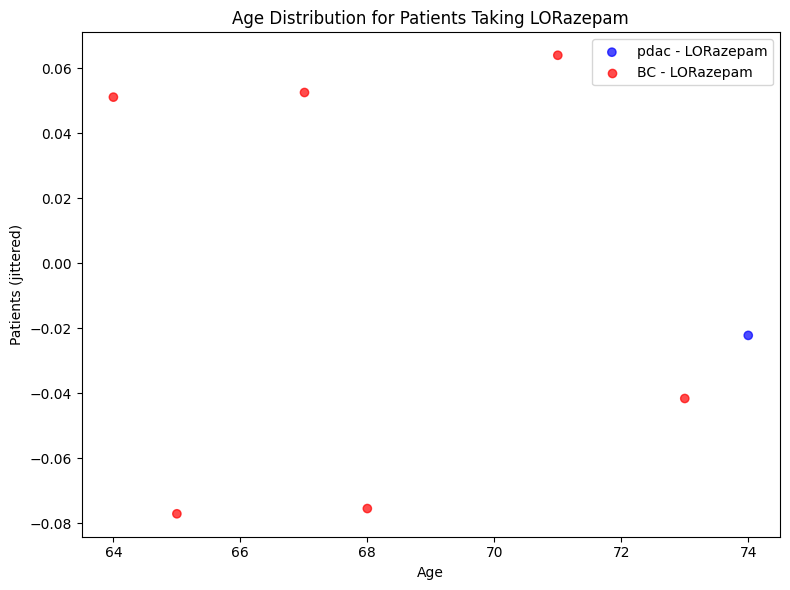

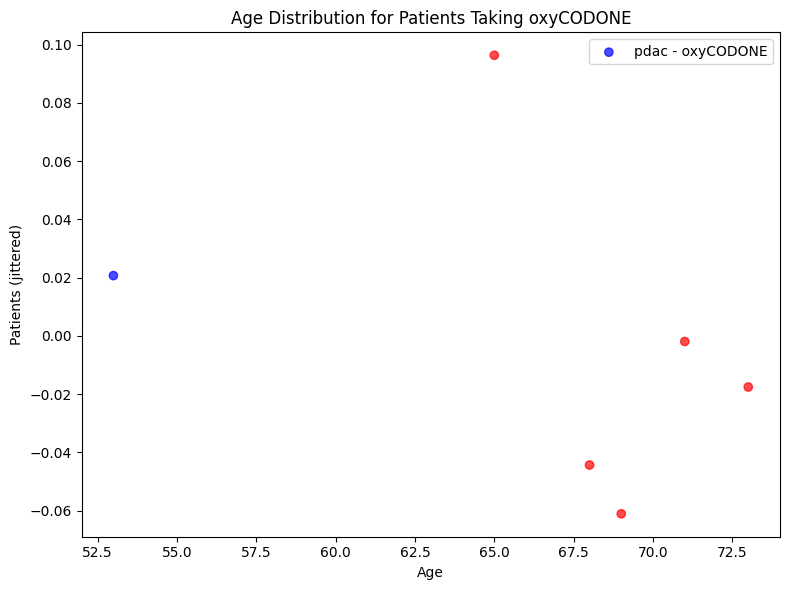

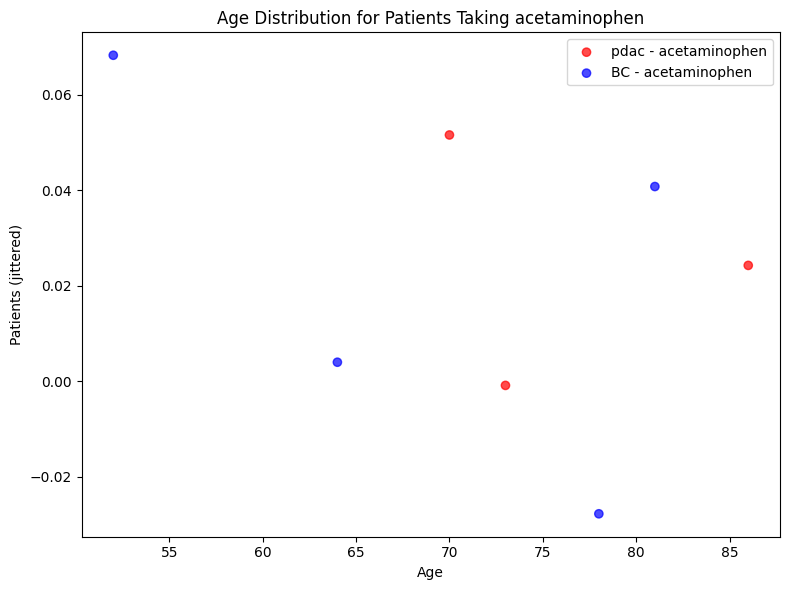

/var/folders/kw/st1ymrwj7q923cvxxbj099fh0000gn/T/ipykernel_4526/2594763336.py:162: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


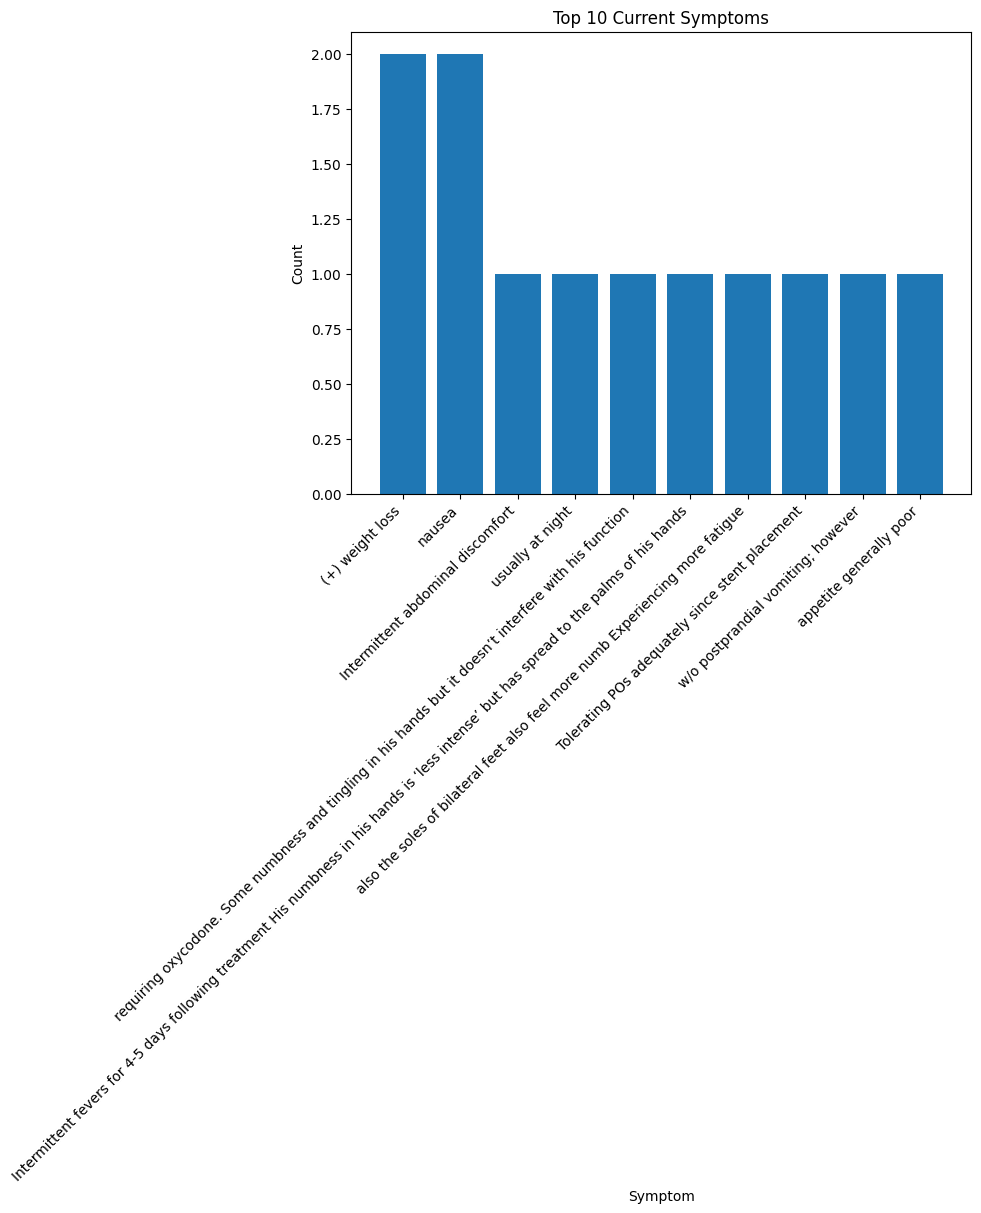

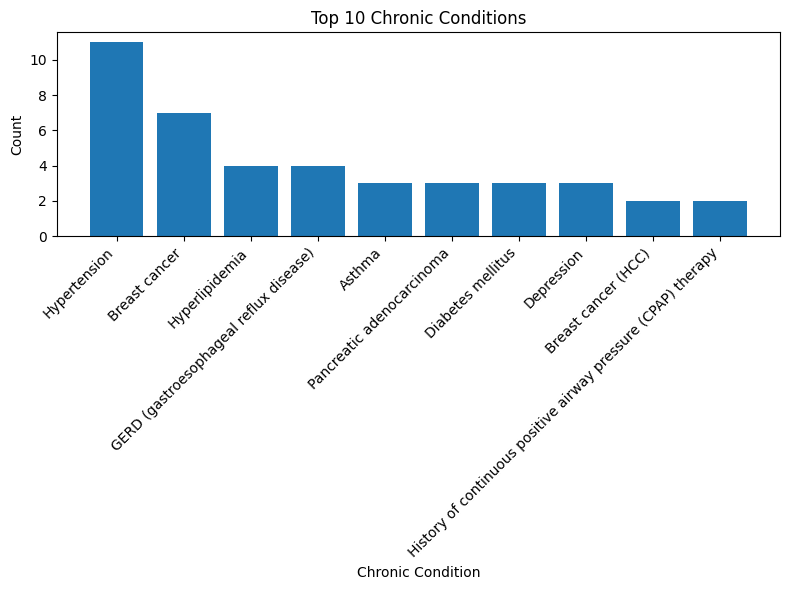

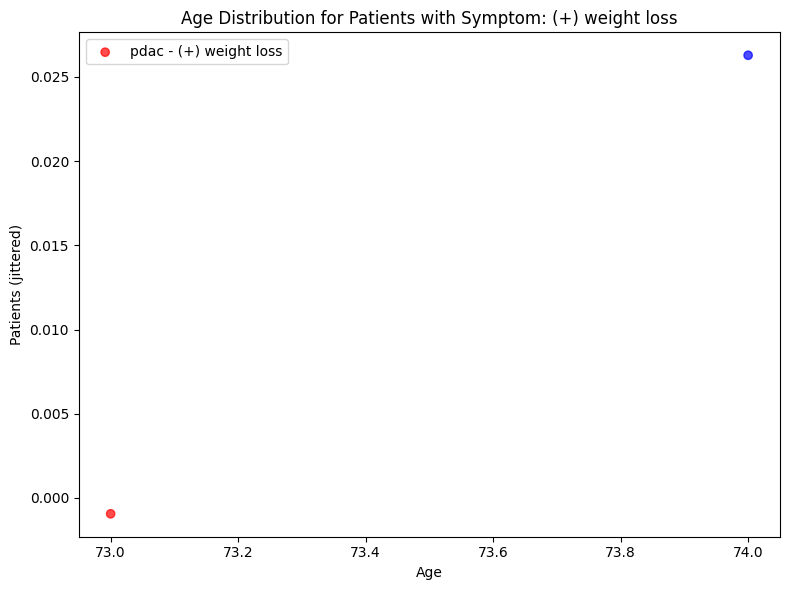

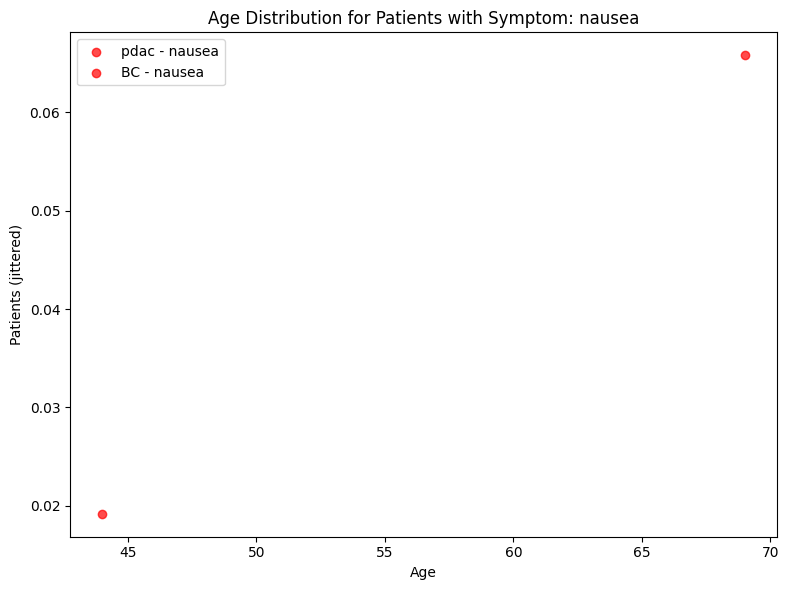

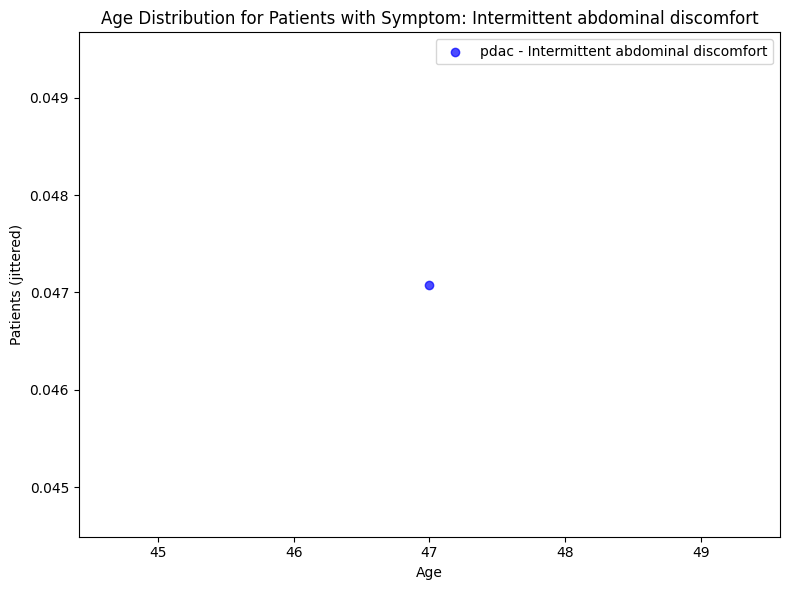

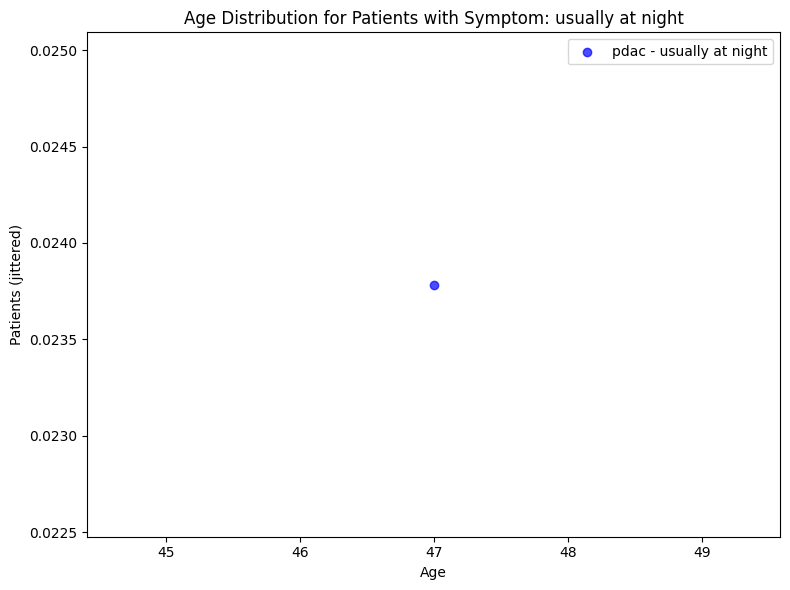

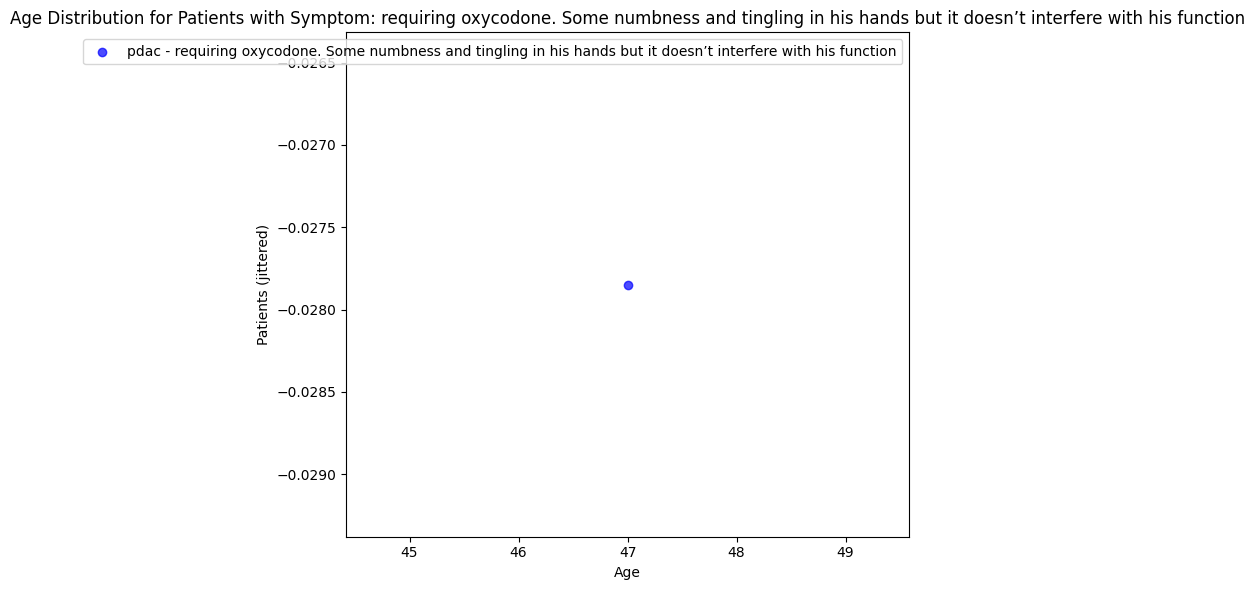

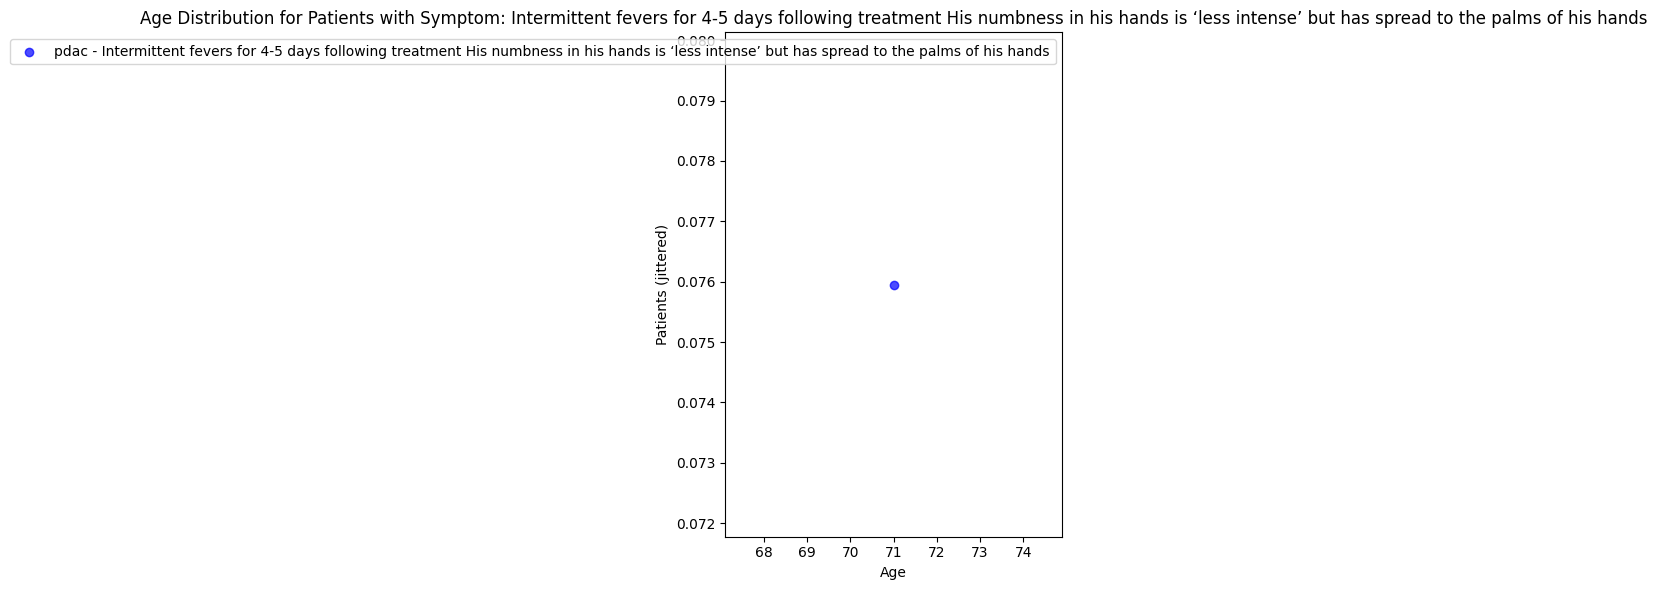

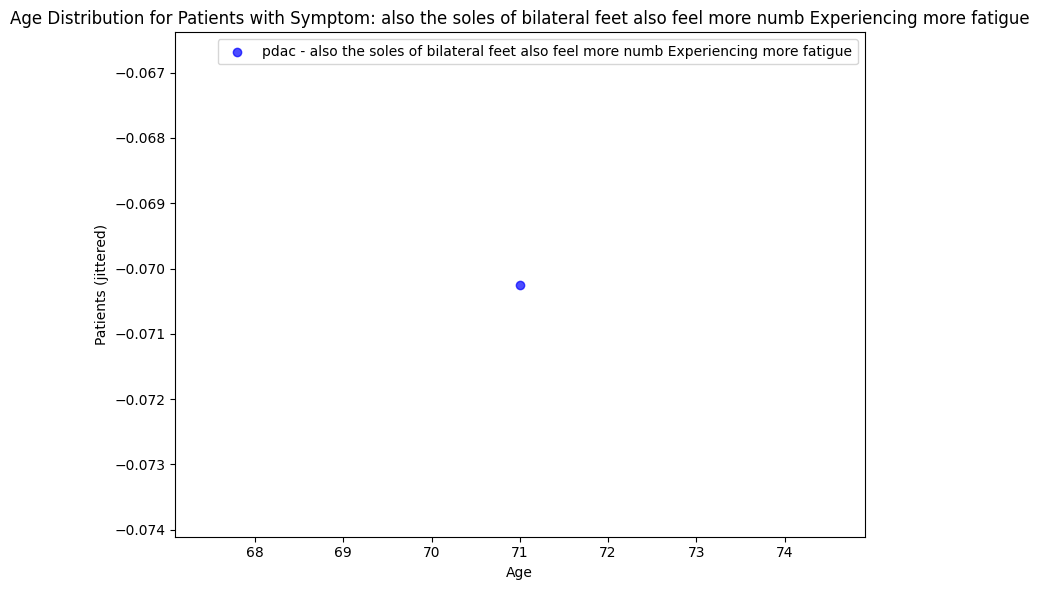

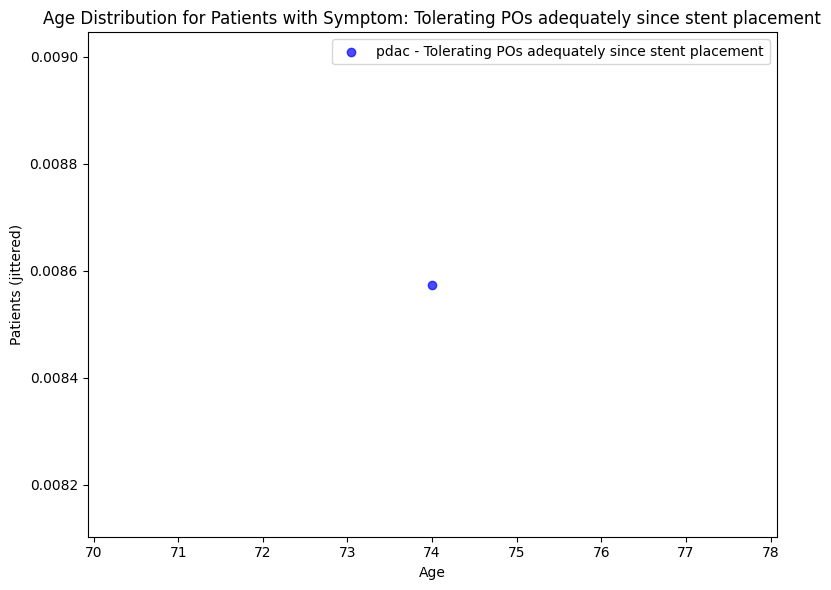

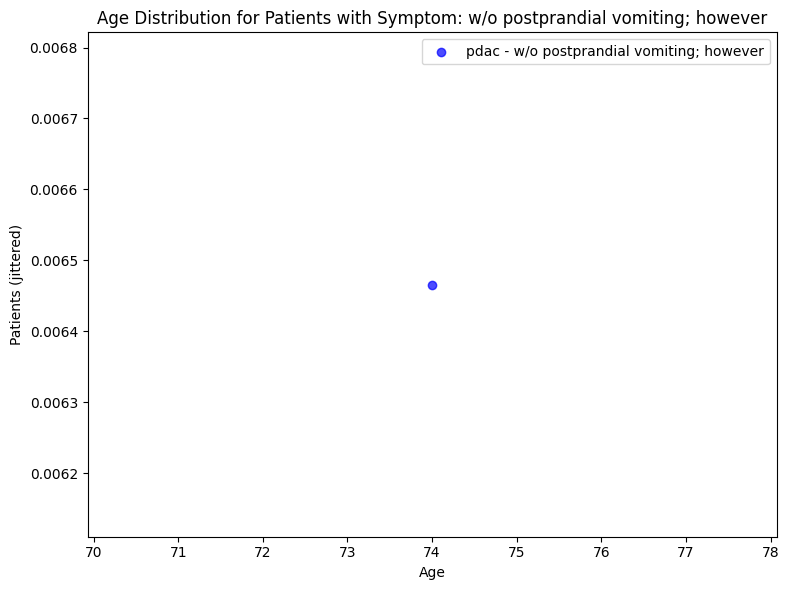

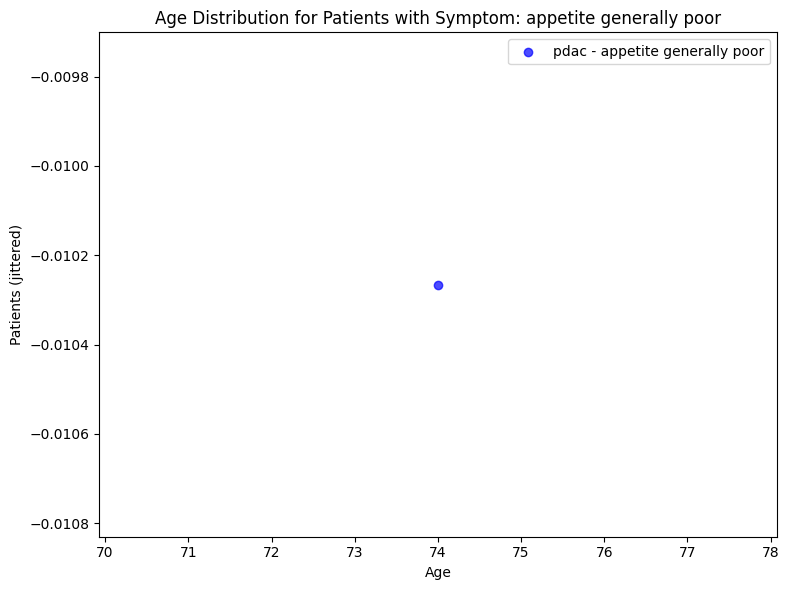

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# ---------------------------
# 1. Create the 'group' column based on 'patient note'
# ---------------------------
def get_group(note):
    """Determine the group based on patient note.
       If note starts with 'pdac' (case-insensitive) => 'pdac';
       if starts with 'bc' => 'BC'; else 'unknown'."""
    if pd.isnull(note):
        return "unknown"
    note_str = str(note).strip().lower()
    if note_str.startswith("pdac"):
        return "pdac"
    elif note_str.startswith("bc"):
        return "BC"
    else:
        return "unknown"

# (Assuming the column name is exactly 'patient note')
combined_df['group'] = combined_df['Patient Note'].apply(get_group)

# ---------------------------
# 2. Graph Age and Gender Distributions
# ---------------------------

# Graph 2A: Age distribution by group (using a histogram for each group)
plt.figure(figsize=(8, 6))
groups = combined_df['group'].unique()
for grp in groups:
    subset = combined_df[combined_df['group'] == grp]
    plt.hist(subset['Age'].dropna(), bins=20, alpha=0.5, label=grp)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Group')
plt.legend()
plt.tight_layout()
plt.show()

# Graph 2B: Gender distribution by group (bar plot)
# Create a pivot table: counts of gender per group
gender_counts = combined_df.groupby('group')['Gender'].value_counts().unstack(fill_value=0)
gender_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Gender Distribution by Group')
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Drug Counts and Distributions
# ---------------------------

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Helper function to recursively flatten a nested list
def flatten_drug_list(nested_list):
    flat_list = []
    for element in nested_list:
        if isinstance(element, list):
            flat_list.extend(flatten_drug_list(element))
        else:
            flat_list.append(element)
    return flat_list

# Updated combine_drugs function to ensure flattening if necessary
def combine_drugs(row):
    drugs = []
    if 'current_drug' in row and isinstance(row['current_drug'], list):
        drugs += row['current_drug']
    if 'past_drug' in row and isinstance(row['past_drug'], list):
        drugs += row['past_drug']
    # Flatten the result so that it's a flat list of strings
    return flatten_drug_list(drugs)

# Assuming your DataFrame is called combined_df and already has columns 'current_drug' and 'past_drug'
combined_df['all_drugs'] = combined_df.apply(combine_drugs, axis=1)

# Count drugs by group using the flattened list
drug_counts_by_group = {}
for grp in combined_df['group'].unique():
    grp_drugs_series = combined_df[combined_df['group'] == grp]['all_drugs']
    flat_list = []
    for drugs in grp_drugs_series:
        # Flatten each cell's drugs and filter out entries that are "none"
        flat_list.extend([d for d in flatten_drug_list(drugs)
                          if isinstance(d, str) and d.lower() != 'none'])
    counts = Counter(flat_list)
    drug_counts_by_group[grp] = counts

# For example, plot the top 10 drugs for each group as a bar chart:
for grp, counts in drug_counts_by_group.items():
    top_drugs = counts.most_common(10)
    if not top_drugs:
        continue
    drugs, count_values = zip(*top_drugs)
    plt.figure(figsize=(8, 6))
    plt.bar(drugs, count_values)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Drug')
    plt.ylabel('Count')
    plt.title(f'Top 10 Drugs in Group {grp.upper()}')
    plt.tight_layout()
    plt.show()

# Overall drug counts (regardless of group)
all_drugs_flat = [drug for sublist in combined_df['all_drugs'] for drug in sublist if drug.lower() != 'none']
overall_drug_counts = Counter(all_drugs_flat)
top_10_drugs = [drug for drug, cnt in overall_drug_counts.most_common(10)]

# For each of the top 10 drugs, plot a scatter of age vs. group with points colored by gender.
# (Here we use distinct markers or colors for gender.)
colors = {'male': 'blue', 'female': 'red', 'unknown': 'gray'}
for drug in top_10_drugs:
    # Filter rows where the drug is present
    mask = combined_df['all_drugs'].apply(lambda drugs: drug in drugs)
    sub_df = combined_df[mask]
    if sub_df.empty:
        continue
    plt.figure(figsize=(8, 6))
    for grp in sub_df['group'].unique():
        grp_df = sub_df[sub_df['group'] == grp]
        # Scatter plot: age on x-axis; using group as y value (jittered for visualization)
        y_vals = np.full(shape=len(grp_df), fill_value=0)  # use jitter instead of literal group text
        jitter = np.random.uniform(-0.1, 0.1, size=len(grp_df))
        y_vals = y_vals + jitter
        plt.scatter(grp_df['Age'], y_vals,
                    c=[colors.get(g, 'gray') for g in grp_df['Gender']],
                    label=f"{grp} - {drug}", alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel('Patients (jittered)')
    plt.title(f'Age Distribution for Patients Taking {drug}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------
# 4. Symptoms and Chronic Conditions Counts
# ---------------------------

# A helper function to flatten list columns and count items
def flatten_and_count(col_name):
    items = [item for sublist in combined_df[col_name] if isinstance(sublist, list) for item in sublist]
    return Counter(items)

# Current symptoms counts
current_symptom_counts = flatten_and_count('current_symptoms_list')
top_10_symptoms = [symptom for symptom, cnt in current_symptom_counts.most_common(10)]

plt.figure(figsize=(8, 6))
symptom_counts_values = [current_symptom_counts[symptom] for symptom in top_10_symptoms]
plt.bar(top_10_symptoms, symptom_counts_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.title('Top 10 Current Symptoms')
plt.tight_layout()
plt.show()

# Chronic conditions counts
chronic_counts = flatten_and_count('chronic_conditions_list')
top_10_chronic = [cond for cond, cnt in chronic_counts.most_common(10)]

plt.figure(figsize=(8, 6))
chronic_counts_values = [chronic_counts[cond] for cond in top_10_chronic]
plt.bar(top_10_chronic, chronic_counts_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Chronic Condition')
plt.ylabel('Count')
plt.title('Top 10 Chronic Conditions')
plt.tight_layout()
plt.show()

# ---------------------------
# Optional: Distributions for Symptoms vs. Age/Gender
# ---------------------------
# For example, for each of the top symptoms, you could create a scatter plot of age colored by gender.
for symptom in top_10_symptoms:
    mask = combined_df['current_symptoms_list'].apply(lambda symptoms: symptom in symptoms)
    sub_df = combined_df[mask]
    if sub_df.empty:
        continue
    plt.figure(figsize=(8, 6))
    for grp in sub_df['group'].unique():
        grp_df = sub_df[sub_df['group'] == grp]
        y_vals = np.full(len(grp_df), 0)
        jitter = np.random.uniform(-0.1, 0.1, size=len(grp_df))
        y_vals = y_vals + jitter
        plt.scatter(grp_df['Age'], y_vals,
                    c=[colors.get(g, 'gray') for g in grp_df['Gender']],
                    label=f"{grp} - {symptom}", alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel('Patients (jittered)')
    plt.title(f'Age Distribution for Patients with Symptom: {symptom}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [8]:
%pip install google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 994.6 kB/s eta 0:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 789.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 715.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 949.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.6/417.6 kB 714.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 504.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 705.5 kB/s eta 0:00:00:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 683.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 787.8 kB/s eta 0:00:00a 0:00:01
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.2/293.2 k

In [ ]:
import pandas as pd
import json
import requests
import time

# Expected fields to extract
#EXPECTED_FIELDS = [
#    "Current Medications", "Past Medications", "Patient Current Age",
#    "Current Symptoms", "Past Symptoms", "Chronic Conditions",
#    "Family History", "Reason for Visit", "Primary Diagnosis",
#    "Procedure Names", "Information Relevant to Primary Diagnosis",
#    "Age", "Gender"
#]

EXPECTED_FIELDS = [
    "Drug Name", "Drug Dosage", "Drug Route of Administration", "Drug Strength", "Drug Form", "Frequency of Drug Intake", "Duration of Drug Intake",
    "Age", "Gender"
]

def extract_fields_from_note(note, api_key= ""):
    """
    Calls the Gemini API and returns extracted fields or False-filled dict on error.
    """
    api_url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={api_key}"

    prompt = f"""
    Extract the following information from the patient note. If information is not present, return "Not mentioned":
    
    Patient Note:
    {note}
    
   - Extract and format as a JSON object with these fields:
   - Drug Name
   - Drug Dosage 
   - Drug Route of Administration
   - Drug Strength 
   - Drug Form
   - Frequency of Drug Intake 
   - Duration of Drug Intake
   - Age
   - Gender


    Return ONLY the JSON object, with no additional text before or after.
    """

    payload = {
        "contents": [{"parts": [{"text": prompt}]}],
        "generationConfig": {
            "temperature": 0.2,
            "maxOutputTokens": 3000
        }
    }

    headers = {"Content-Type": "application/json"}

    try:
        response = requests.post(api_url, json=payload, headers=headers)
        if response.status_code == 200:
            content = response.json()['candidates'][0]['content']['parts'][0]['text']
            json_start = content.find('{')
            json_end = content.rfind('}') + 1
            if json_start >= 0 and json_end > json_start:
                json_str = content[json_start:json_end]
                data = json.loads(json_str)
                return {field: data.get(field, "Not mentioned") for field in EXPECTED_FIELDS}
            else:
                return {field: False for field in EXPECTED_FIELDS}
        else:
            print(f"API error at status {response.status_code}: {response.text}")
            return {field: False for field in EXPECTED_FIELDS}
    except Exception as e:
        print(f"Exception during API call: {e}")
        return {field: False for field in EXPECTED_FIELDS}


def process_dataframe_clean(df, api_key, note_column="Entire Patient Note"):
    """
    Processes the dataframe and ensures 41 rows output: 1 header + 40 patient notes.
    Fills in all fields even on error with False values.
    """
    processed_data = []

    for idx in range(40):  # Force exactly 40 rows
        if idx >= len(df):
            processed_data.append({field: False for field in EXPECTED_FIELDS})
            continue

        note = df.iloc[idx].get(note_column, "")
        if pd.isna(note) or note.strip() == "":
            print(f"Skipping empty note at index {idx}")
            processed_data.append({field: False for field in EXPECTED_FIELDS})
            continue

        print(f"Processing note {idx+1}/40...")
        extracted_fields = extract_fields_from_note(note, api_key)
        processed_data.append(extracted_fields)
        time.sleep(0.5)

    # Create final DataFrame
    final_df = pd.DataFrame(processed_data, columns=EXPECTED_FIELDS)
    final_df.index.name = "Patient Index"
    return final_df


# Example usage:
final_df = process_dataframe_clean(combined_df, api_key="")
final_df.to_csv("cleaned_extracted_medical_info_all_drug_categories_RG.csv")

Processing note 1/40...
Processing note 2/40...
Processing note 3/40...
Processing note 4/40...
Processing note 5/40...
Processing note 6/40...
Processing note 7/40...
Processing note 8/40...
Processing note 9/40...
Processing note 10/40...
Processing note 11/40...
Processing note 12/40...
Processing note 13/40...
Processing note 14/40...
Processing note 15/40...
Processing note 16/40...
Processing note 17/40...
Processing note 18/40...
Processing note 19/40...
Processing note 20/40...
Processing note 21/40...
Processing note 22/40...
Processing note 23/40...
Processing note 24/40...
Processing note 25/40...
Processing note 26/40...
Processing note 27/40...
Processing note 28/40...
Processing note 29/40...
Processing note 30/40...
Processing note 31/40...
Processing note 32/40...
Processing note 33/40...
Processing note 34/40...
Processing note 35/40...
Processing note 36/40...
Processing note 37/40...
Processing note 38/40...
Processing note 39/40...
Processing note 40/40...


In [23]:
##Remove duplicates from med7 files:
import json
from collections import Counter

def replace_nested_with_mode(json_file_path, json_file_name):
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    for entry in data:
        for key, value in entry.items():
            if isinstance(value, list) and value:
                normalized_values = [v.lower() for v in value]
                counts = Counter(normalized_values)
                most_common = counts.most_common()
                
                entry[key] = most_common[0][0]  
    
    with open('modified_' + json_file_name, 'w') as f:
        json.dump(data, f, indent=2)
    
    return data

json_file_name = "medications_note_pdac1.json"  
json_file_path = "med7/medications_note_pdac2.json"
processed_data = replace_nested_with_mode(json_file_path, json_file_name)

In [ ]:
#modify all json files so no duplicates
for i in range(0, 40):
    if i < 20:
        json_file_name = "medications_note_pdac" + str(i) + ".json"
    else:
        json_file_name = "medications_note_BC" + str(i) + ".json"
    
    json_file_path = "med7/" + json_file_name
    replace_nested_with_mode(json_file_path=json_file_path, json_file_name=json_file_name)

In [ ]:
#Take modified json file and convert to dataframe format we like
def json_to_single_row_dataframe(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    columns = [
        "Drug Name", "Drug Dosage", "Drug Route of Administration", "Drug Strength", 
        "Drug Form", "Frequency of Drug Intake", "Duration of Drug Intake"
    ]
    
    json_keys = ["DRUG", "DOSAGE", "ROUTE", "STRENGTH", "FORM", "FREQUENCY", "DURATION"]
    
    n = len(data)
    processed_data = {
        col: [entry.get(key, "Not mentioned") for entry in data]
        for col, key in zip(columns, json_keys)
    }
    
    df = pd.DataFrame([processed_data])
    return df

json_file = "modified_med7/modified_medications_note_pdac0.json" 
df = json_to_single_row_dataframe(json_file)
display(df)


,Drug Name,Drug Dosage,Drug Route of Administration,Drug Strength,Drug Form,Frequency of Drug Intake,Duration of Drug Intake
0,"[gemcitabine, Abraxane, antibiotics, oxycodone...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, iv, Not mentioned, Not mention...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."


In [35]:
#convert all modified json files into one df
def concat_all_json_dfs():
    final_df = pd.DataFrame()
    for i in range(0, 40):
        if i < 20:
            json_file = "modified_med7/modified_medications_note_pdac" + str(i) + ".json"
        else:
            json_file = "modified_med7/modified_medications_note_BC" + str(i) + ".json"
        new_row = json_to_single_row_dataframe(json_file)
        final_df= pd.concat([final_df, new_row], ignore_index=True)
    return final_df

med7_df = concat_all_json_dfs()
med7_df.to_csv("Med7_Extracted_Results_RG.csv")
display(med7_df)

,Drug Name,Drug Dosage,Drug Route of Administration,Drug Strength,Drug Form,Frequency of Drug Intake,Duration of Drug Intake
0,"[gemcitabine, Abraxane, antibiotics, oxycodone...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, iv, Not mentioned, Not mention...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."
1,"[Cipro, FOLFIRINOX, FOLFIRINOX, FOLFIRINOX, Ge...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."
2,"[FOLFIRINOX, chemotherapy, FOLFOX, 5-FU, oxali...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."
3,"[FOLFIRINOX, gemcitabine, Abraxane, chemothera...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, 28 day cycles, ..."
4,"[FOLFIRINOX, Irinotecan, FOLFOX, FOLFIRINOX, I...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."
5,"[FOLFIRINOX, CONTRAST, Omnipaque, CONTRAST, co...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, 350, Not mentio...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ..."
6,"[chemotherapy, gemcitabine, Abraxane, oxycodon...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, alternate week,...","[Not mentioned, Not mentioned, Not mentioned, ..."
7,"[Not mentioned, FOLFOX chemotherapy, irinoteca...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[1 cycle, Not mentioned, Not mentioned, 11 cyc..."
8,"[FOLFIRINOX, FOLFIRINOX, 5FU, irinotecan, 5FU,...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[12 cycles, Not mentioned, Not mentioned, 12 c..."
9,"[FOLFIRINOX, FOLFIRINOX, 5FU, oxaliplatin, iri...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, 2400mg/m2, 85 m...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, Not mentioned, ...","[Not mentioned, Not mentioned, over 48 hours, ..."


In [80]:
##Similarity metric that could be used to compare two lists:
from itertools import product
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine

def list_similarity(list1, list2, similarity_func):
    """Computes similarity between two lists of different lengths, accounting for 'Not mentioned'."""
    
    # Count 'Not mentioned' occurrences
    not_mentioned_count_1 = list1.count("Not mentioned")
    not_mentioned_count_2 = list2.count("Not mentioned")
    
    # Consider proportion of 'Not mentioned' values as similarity factor
    not_mentioned_sim = 1 - abs(not_mentioned_count_1 / len(list1) - not_mentioned_count_2 / len(list2))
    
    # Compute pairwise similarity for all real (non-'Not mentioned') values
    valid_pairs = [(i, j) for i, val1 in enumerate(list1) for j, val2 in enumerate(list2)]
    similarity_matrix = np.zeros((len(list1), len(list2)))

    for i, j in valid_pairs:
        if list1[i] == "Not mentioned" or list2[j] == "Not mentioned":
            similarity_matrix[i, j] = 0  # Explicit penalty for mismatch
        else:
            similarity_matrix[i, j] = similarity_func(list1[i], list2[j])  # Use similarity metric
    
    # Use Hungarian algorithm to find best matches
    row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity
    matched_sim = sum(similarity_matrix[row_ind, col_ind]) / max(len(list1), len(list2))
    
    # Final similarity score (combining content matching and 'Not mentioned' alignment)
    final_score = (matched_sim + not_mentioned_sim) / 2
    return final_score

jaccard_sim = lambda a, b: len(set(a.split()) & set(b.split())) / len(set(a.split()) | set(b.split()))

def cosine_similarity(str1, str2):
    """Computes cosine similarity between two text strings using TF-IDF."""
    vectorizer = TfidfVectorizer().fit([str1, str2])
    vecs = vectorizer.transform([str1, str2]).toarray()
    return 1 - cosine(vecs[0], vecs[1])  # Cosine similarity (1 - distance)

def ratio_similarity(num1, num2):
    """Computes ratio-based similarity for numerical values."""
    try:
        num1, num2 = float(num1), float(num2)
        return min(num1, num2) / max(num1, num2) if max(num1, num2) != 0 else 0
    except ValueError:
        return 0  # Handle cases where non-numeric values are passed
    
med7_df = med7_df.map(lambda x: x if isinstance(x, list) else [x]) #ensure all elements in df are type list
final_df = final_df.map(lambda x: x if isinstance(x, list) else [x])

    
similarity_means = []
for c in range(7):
    sim_metric = []
    if c == 1 or c == 3:
        sim_func = ratio_similarity
    else:
        sim_func = jaccard_sim
    for r in range(40):
        list1 = med7_df.iloc[r, c]
        list2 = final_df.iloc[r, c] #going down rows and storing metric at each one
        sim_metric.append(list_similarity(list1, list2, sim_func))
    similarity_means.append(sum(sim_metric)/len(sim_metric))

similarity_means = np.array(similarity_means)
print(similarity_means)




[0.61511927 0.22762223 0.27316892 0.26738388 0.31324186 0.33600427
 0.32849362]


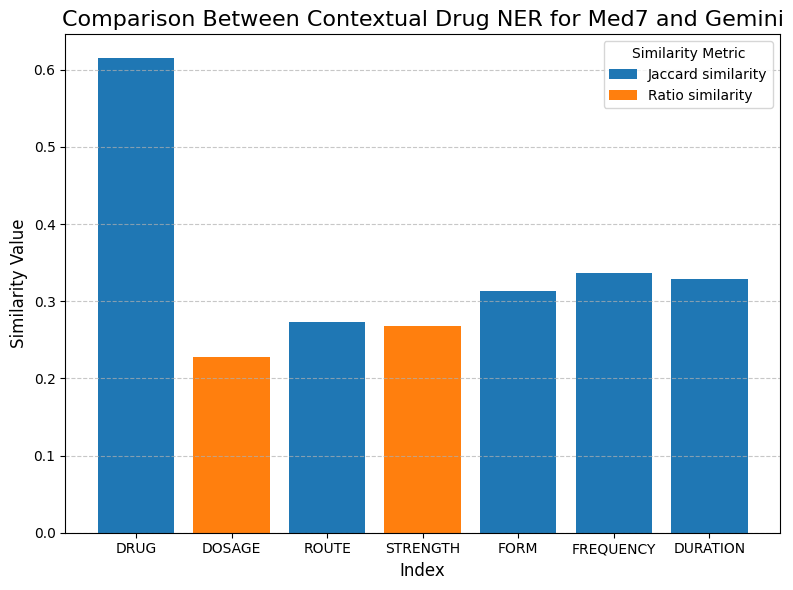

In [87]:
##Plot bar chart for similarities
# Create a color list where indices 1 and 3 have a different color
import matplotlib.pyplot as plt
import seaborn as sns
values = similarity_means
colors = ['tab:blue' if i not in [1, 3] else 'tab:orange' for i in range(len(values))]

# Create a corresponding labels list for the legend
labels = ['Jaccard similarity' if i not in [1, 3] else 'Ratio similarity' for i in range(len(values))]

columns = ['DRUG', 'DOSAGE', 'ROUTE', 'STRENGTH', 'FORM', 'FREQUENCY', 'DURATION']

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(values)), values, color=colors)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[bars[0], bars[1]], labels=['Jaccard similarity', 'Ratio similarity'], title="Similarity Metric")

# Customize the plot aesthetics
plt.title('Comparison Between Contextual Drug NER for Med7 and Gemini', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Similarity Value', fontsize=12)
plt.xticks(range(len(values)), labels=columns)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import requests
import json

def test_gemini_api():
    api_key = ""  # Replace with your actual key
    api_url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={api_key}"
    
    payload = {
        "contents": [{
            "parts": [{"text": "Explain how AI works"}]
        }]
    }
    
    headers = {
        "Content-Type": "application/json"
    }
    
    response = requests.post(api_url, json=payload, headers=headers)
    print(f"Status code: {response.status_code}")
    print(json.dumps(response.json(), indent=2))

    print(api_url)
    return response

# Run the test
test_gemini_api()

Status code: 403
{
  "error": {
    "code": 403,
    "message": "Method doesn't allow unregistered callers (callers without established identity). Please use API Key or other form of API consumer identity to call this API.",
    "status": "PERMISSION_DENIED"
  }
}
https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=


<Response [403]>

In [27]:
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM
import pandas as pd

# Load ClinicalBERT
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)
model.eval()

EXPECTED_FIELDS = [
    "Current Medications", "Past Medications", "Patient Current Age",
    "Current Symptoms", "Past Symptoms", "Chronic Conditions",
    "Family History", "Reason for Visit", "Primary Diagnosis",
    "Procedure Names", "Information Relevant to Primary Diagnosis",
    "Age", "Gender"
]

def chunk_text(text, max_tokens=512, stride=256):
    tokens = tokenizer.tokenize(text)
    chunks = []
    start = 0
    while start < len(tokens):
        chunk_tokens = tokens[start:start+max_tokens]
        chunk = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk)
        start += stride
    return chunks

def extract_field_from_chunk(chunk, field):
    prompt = f"{chunk}\n\nThe patient's {field.lower()} is [MASK]."
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
    mask_idx = torch.where(inputs.input_ids == tokenizer.mask_token_id)[1]

    if mask_idx.numel() == 0:
        return None

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        mask_logits = logits[0, mask_idx, :]
        predicted_token_id = torch.argmax(mask_logits, dim=-1)
        predicted_token = tokenizer.decode(predicted_token_id).strip()
        return predicted_token

def extract_fields_from_note_chunked(note):
    try:
        chunks = chunk_text(note)
        extracted = {}

        for field in EXPECTED_FIELDS:
            for chunk in chunks:
                result = extract_field_from_chunk(chunk, field)
                if result and result.lower() != '[mask]':
                    extracted[field] = result
                    break  # take first valid result
            if field not in extracted:
                extracted[field] = "Not mentioned"
                
        return extracted
    except Exception as e:
        print(f"Extraction error: {e}")
        return {field: False for field in EXPECTED_FIELDS}

def process_dataframe_clinicalbert_chunked(df, note_column="Entire Patient Note"):
    processed_data = []

    for idx in range(40):  # Ensure exactly 40 notes
        if idx >= len(df):
            processed_data.append({field: False for field in EXPECTED_FIELDS})
            continue

        note = df.iloc[idx].get(note_column, "")
        if pd.isna(note) or note.strip() == "":
            print(f"Skipping empty note at index {idx}")
            processed_data.append({field: False for field in EXPECTED_FIELDS})
            continue

        print(f"Processing note {idx+1}/40...")
        extracted = extract_fields_from_note_chunked(note)
        processed_data.append(extracted)

    final_df = pd.DataFrame(processed_data, columns=EXPECTED_FIELDS)
    final_df.index.name = "Patient Index"
    return final_df

final_df = process_dataframe_clinicalbert_chunked(combined_df)
final_df.to_csv("clinicalbert_chunked_output.csv", index=False)

Processing note 1/40...
Processing note 2/40...
Processing note 3/40...
Processing note 4/40...
Processing note 5/40...
Processing note 6/40...
Processing note 7/40...
Processing note 8/40...
Processing note 9/40...
Processing note 10/40...
Processing note 11/40...
Processing note 12/40...
Processing note 13/40...
Processing note 14/40...
Processing note 15/40...
Processing note 16/40...
Processing note 17/40...
Processing note 18/40...
Processing note 19/40...
Processing note 20/40...
Processing note 21/40...
Processing note 22/40...
Processing note 23/40...
Processing note 24/40...
Processing note 25/40...
Processing note 26/40...
Processing note 27/40...
Processing note 28/40...
Processing note 29/40...
Processing note 30/40...
Processing note 31/40...
Processing note 32/40...
Processing note 33/40...
Processing note 34/40...
Processing note 35/40...
Processing note 36/40...
Processing note 37/40...
Processing note 38/40...
Processing note 39/40...
Processing note 40/40...


In [29]:
import requests
import json
import pandas as pd

HF_API_URL = "https://api-inference.huggingface.co/models/meta-llama/Meta-Llama-3-8B-Instruct"
HF_TOKEN = ""  # get it from https://huggingface.co/settings/tokens

EXPECTED_FIELDS = [
    "Current Medications", "Past Medications", "Patient Current Age",
    "Current Symptoms", "Past Symptoms", "Chronic Conditions",
    "Family History", "Reason for Visit", "Primary Diagnosis",
    "Procedure Names", "Information Relevant to Primary Diagnosis",
    "Age", "Gender"
]

headers = {
    "Authorization": f"Bearer {HF_TOKEN}",
    "Content-Type": "application/json"
}

def build_prompt(note):
    return (
        f"Patient Note:\n{note}\n\n"
        f"Extract the following fields as a JSON object: {', '.join(EXPECTED_FIELDS)}. "
        f"If a field is missing, return 'Not mentioned'. Return only a JSON object."
    )

def call_llama3(note):
    payload = {
        "inputs": build_prompt(note),
        "parameters": {
            "temperature": 0.2,
            "max_new_tokens": 3000,
            "return_full_text": False
        }
    }
    try:
        response = requests.post(HF_API_URL, headers=headers, json=payload)
        result = response.json()
        if isinstance(result, list) and "generated_text" in result[0]:
            content = result[0]["generated_text"]
            json_start = content.find("{")
            json_end = content.rfind("}") + 1
            json_str = content[json_start:json_end]
            return json.loads(json_str)
        else:
            print(f"Error: Unexpected response format: {result}")
            return {field: False for field in EXPECTED_FIELDS}
    except Exception as e:
        print(f"LLaMA API error: {e}")
        return {field: False for field in EXPECTED_FIELDS}

def process_notes_llama(df, note_column="Entire Patient Note"):
    results = []
    for idx in range(40):
        if idx >= len(df):
            results.append({field: False for field in EXPECTED_FIELDS})
            continue
        note = df.iloc[idx].get(note_column, "")
        if pd.isna(note) or note.strip() == "":
            results.append({field: False for field in EXPECTED_FIELDS})
            continue
        print(f"Processing note {idx+1}/40...")
        result = call_llama3(note)
        results.append(result)
    return pd.DataFrame(results)

result_df = process_notes_llama(combined_df, note_column="Entire Patient Note")
result_df.to_csv("llama3_extracted_info.csv", index=False)

Processing note 1/40...
Processing note 2/40...
Processing note 3/40...
Processing note 4/40...
Processing note 5/40...
Processing note 6/40...
Processing note 7/40...
Processing note 8/40...
Processing note 9/40...
Processing note 10/40...
Processing note 11/40...
Processing note 12/40...
Error: Unexpected response format: {'error': 'Input validation error: `inputs` tokens + `max_new_tokens` must be <= 8192. Given: 7336 `inputs` tokens and 1024 `max_new_tokens`', 'error_type': 'validation'}
Processing note 13/40...
LLaMA API error: Expecting value: line 1 column 1 (char 0)
Processing note 14/40...
Processing note 15/40...
Processing note 16/40...
Processing note 17/40...
Processing note 18/40...
LLaMA API error: Expecting ',' delimiter: line 116 column 6 (char 3131)
Processing note 19/40...
Processing note 20/40...
Processing note 21/40...
Processing note 22/40...
Processing note 23/40...
Processing note 24/40...
Processing note 25/40...
Processing note 26/40...
Processing note 27/40.

In [6]:
##Clean up Llama3 data frame
unclean_df = pd.read_csv("llama3_extracted_info.csv")
unclean_df

,Current Medications,Past Medications,Patient Current Age,Current Symptoms,Past Symptoms,Chronic Conditions,Family History,Reason for Visit,Primary Diagnosis,Procedure Names,Information Relevant to Primary Diagnosis,Age,Gender
0,['See intake'],Not mentioned,47,"['abdominal discomfort', 'pain', 'numbness and...",['gross hematuria'],['hypertension'],"['maternal grandmother had colorectal cancer',...",Follow-up visit,Locally advanced adenocarcinoma of the pancreas,"['ERCP with an EUS', 'placement of plastic ste...","['biliary obstruction', 'pancreatic mass', 'po...",47,Male
1,"['ALPRAZolam (XANAX) 0.25 mg tablet', 'atorvas...",Not mentioned,71,"['fevers for 4-5 days following treatment', 'n...",Not mentioned,['COPD (chronic obstructive pulmonary disease)...,"['Father: Pancreatic cancer', 'Maternal Uncle:...",Follow-up of his diagnosis of Adenocarcinoma o...,Adenocarcinoma of the pancreas,"['IR PORT PLACEMENT', 'PANCREAS SURGERY']","SPINK1 carrier, variant of unknown significanc...",71,Male
2,['acetaminophen (TYLENOL ORAL) Take 200 mg by ...,Not mentioned,74,"['Occasional bilateral abdominal pain', 'Gener...",Not mentioned,Not mentioned,Not mentioned,Follow-up of metastatic pancreatic cancer,Metastatic Pancreatic Ductal Adenocarcinoma (P...,"['CT ABDOMEN/PELVIS WITH CONTRAST', 'CT CHEST ...","['Multicystic, ill-defined mass measures 4.7 x...",74,Male
3,['buPROPion (WELLBUTRIN SR) 100 mg 12 hr table...,Not mentioned,64,"['brain fog', 'numbness and tingling in her fi...",Not mentioned,['adenocarcinoma of the pancreas'],Not mentioned,Follow-up visit,Metastatic adenocarcinoma of the pancreas,"['ERCP', 'CT Abdomen/Pelvis with Contrast', 'C...","['extent of disease uncertain', 'new liver les...",64,Female
4,"['butenafine (LOTRIMIN ULTRA) 1 % cream', 'cho...",['palonosetron (Aloxi)'],53,"['oral thrush', 'abdominal pain/cramping', 'we...",['hyperbilirubinemia'],['Gilbert syndrome'],Not mentioned,follow-up of his diagnosis of adenocarcinoma o...,adenocarcinoma of the pancreas,"['EUS directed FNA', 'biopsy of abdominal wall...",['oligo metastatic disease in the abdominal wa...,53,Male
5,modified FOLFIRINOX,Not mentioned,63,"abdominal discomfort, bloating, jaundice, pleu...","abdominal discomfort, bloating, jaundice",Not mentioned,Not mentioned,follow-up,adenocarcinoma of the pancreas,"laparoscopy, pylorus-preserving pancreatectomy...","CT scan, PET/CT, EUS, FNA, laparoscopy, surgic...",63,Female
6,"['bisacodyL (DULCOLAX) 5 mg EC tablet', 'chole...",Not mentioned,68,no cancer pain but take oxycodone for chronic ...,Not mentioned,"Chronic opioid use, arthritis, chronic back pa...",The only cancer in her family is in maternal a...,restaging scan,Adenocarcinoma the tail of the pancreas,['CT Abdomen/Pelvis with and without contrast'...,The mass in the tail of the pancreas was PET a...,68,Not mentioned
7,['acetaminophen (TYLENOL PO) take by mouth eve...,['erythromycin causing rash'],69,mild fatigue and transient nausea,painless jaundice,"['hypertension', 'hyperlipidemia']",['Paternal grandmother with esophageal cancer'...,consultation for recurrent metastatic pancreat...,metastatic pancreatic adenocarcinoma,"['Whipple resection', 'ERCP', 'EUS-guided FNA'...",Patient has a known germline ATM mutation and ...,69,Female
8,['albuterol 90 mcg/actuation metered dose inha...,Not mentioned,71,"['Worsening neuropathy', 'Improved abdominal p...","['Nausea 11/14/2016', 'Obstructive sleep apnea']","['Lupus', 'Asthma', 'Breast cancer (HCC)', 'Ob...","['Stomach cancer Mother', 'Colon cancer Sister...",Follow-up,Metastatic pancreatic cancer,"['ENDO ADULT EGD WITH PEG/TUBE PLACEMENT', 'IR...",BRCA variant of unknown significance in the se...,71,Female
9,[{'Medication': 'diphenoxylate-atropine (LOMOT...,Not mentioned,73,['Constant saltiness in mouth which limits her...,Not mentioned,Not mentioned,Not mentioned,Follow-up visit,Locally advanced pancreatic cancer,"['EUS', 'CT AP Pancreatic Protocol', 'CT chest...",['Stable pancreatic mass with vessel encasemen...,73

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import lda  # The LDA library

# If you haven't downloaded NLTK stopwords/punkt yet, do so:
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smallina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/smallina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
pdac_df = combined_df.iloc[0:20].copy()
bc_df   = combined_df.iloc[20:40].copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

pdac_df["clean_note"] = pdac_df["Entire Patient Note"].astype(str).apply(clean_text)
bc_df["clean_note"]   = bc_df["Entire Patient Note"].astype(str).apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/smallina/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smallina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


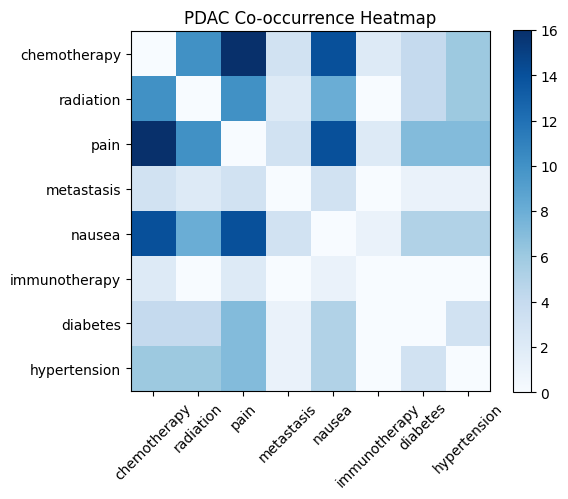

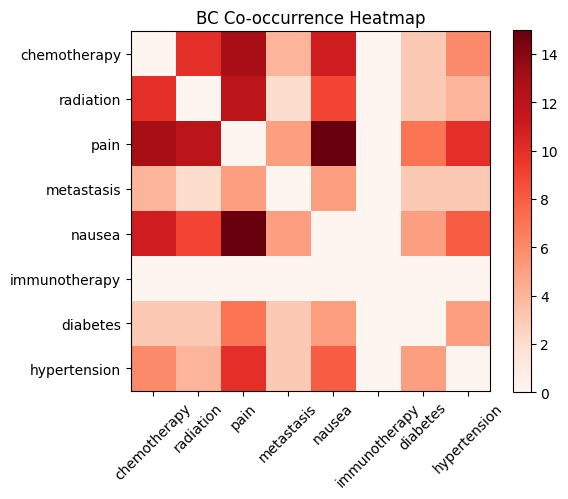

In [35]:
def build_cooccurrence_matrix(texts, terms):
    # Map each term to an index
    term_index = {t: i for i, t in enumerate(terms)}
    size = len(terms)
    matrix = np.zeros((size, size), dtype=int)

    for doc in texts:
        doc_tokens = set(doc.split())  # unique tokens in doc
        doc_terms = [t for t in doc_tokens if t in term_index]
        # For each pair of terms, increment co-occurrence
        for i in range(len(doc_terms)):
            for j in range(i+1, len(doc_terms)):
                idx1 = term_index[doc_terms[i]]
                idx2 = term_index[doc_terms[j]]
                matrix[idx1, idx2] += 1
                matrix[idx2, idx1] += 1
    return matrix

target_terms = ["chemotherapy","radiation","pain","metastasis",
                "nausea","immunotherapy","diabetes","hypertension"]

# PDAC co-occurrence
pdac_co_mat = build_cooccurrence_matrix(pdac_df["clean_note"], target_terms)

plt.figure(figsize=(6,5))
plt.imshow(pdac_co_mat, cmap="Blues", interpolation="nearest")
plt.xticks(range(len(target_terms)), target_terms, rotation=45)
plt.yticks(range(len(target_terms)), target_terms)
plt.colorbar()
plt.title("PDAC Co-occurrence Heatmap")
plt.tight_layout()
plt.show()

# BC co-occurrence
bc_co_mat = build_cooccurrence_matrix(bc_df["clean_note"], target_terms)

plt.figure(figsize=(6,5))
plt.imshow(bc_co_mat, cmap="Reds", interpolation="nearest")
plt.xticks(range(len(target_terms)), target_terms, rotation=45)
plt.yticks(range(len(target_terms)), target_terms)
plt.colorbar()
plt.title("BC Co-occurrence Heatmap")
plt.tight_layout()
plt.show()

In [36]:
from collections import Counter
import math

def compute_tfidf(docs, top_n=10):
    """
    Return top_n terms by TF-IDF across the corpus.
    """
    # 1) Count term frequencies (TF)
    doc_counts = []
    for doc in docs:
        c = Counter(doc.split())
        doc_counts.append(c)

    # 2) Compute document frequency (DF)
    df_counts = Counter()
    total_docs = len(docs)
    for c in doc_counts:
        for term in c.keys():
            df_counts[term] += 1

    # 3) Compute TF-IDF for each term
    tfidf_scores = {}
    for doc_idx, c in enumerate(doc_counts):
        for term, freq in c.items():
            tf = freq  # raw count
            df = df_counts[term]
            idf = math.log((total_docs + 1) / (df + 1)) + 1
            score = tf * idf
            tfidf_scores[term] = tfidf_scores.get(term, 0) + score

    # Sort by overall TF-IDF
    sorted_terms = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_terms[:top_n]

print("Top TF-IDF PDAC:")
print(compute_tfidf(pdac_df["clean_note"], top_n=10))
print("---")
print("Top TF-IDF BC:")
print(compute_tfidf(bc_df["clean_note"], top_n=10))

Top TF-IDF PDAC:
[('mg', 316.23728627266877), ('tablet', 215.8261771276973), ('take', 210.767782298094), ('pancreatic', 209.0), ('ct', 203.0), ('patient', 180.0), ('cancer', 172.0), ('mouth', 163.52672764507292), ('history', 156.0), ('mass', 143.68425249121225)]
---
Top TF-IDF BC:
[('breast', 607.0), ('right', 353.0), ('cm', 322.0), ('left', 294.0), ('mg', 248.0270745193101), ('tablet', 232.76386993350644), ('mass', 210.8068229980559), ('history', 204.0), ('cancer', 197.0), ('patient', 193.0)]


In [37]:
from collections import defaultdict

def make_term_matrix(docs, vocab=None):
    """
    Build a doc-term matrix (list of lists) + vocabulary list from cleaned docs.
    This is a minimal approach, no SciPy or scikit-learn.
    """
    if vocab is None:
        vocab_set = set()
        for doc in docs:
            vocab_set.update(doc.split())
        vocab = sorted(list(vocab_set))

    vocab_index = {word: i for i, word in enumerate(vocab)}
    dt_matrix = np.zeros((len(docs), len(vocab)), dtype=int)

    for doc_i, doc in enumerate(docs):
        for token in doc.split():
            if token in vocab_index:
                dt_matrix[doc_i, vocab_index[token]] += 1
    return dt_matrix, vocab

# Build doc-term matrix for PDAC
pdac_docs = pdac_df["clean_note"].tolist()
pdac_dtm, pdac_vocab = make_term_matrix(pdac_docs)

# Train LDA model
model = lda.LDA(n_topics=3, n_iter=500, random_state=42)
model.fit(pdac_dtm)

# Print top words per topic
topic_word = model.topic_word_  # shape: [n_topics, n_vocab]
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    top_word_ids = np.argsort(topic_dist)[::-1][:n_top_words]
    topic_words = [pdac_vocab[w_id] for w_id in top_word_ids]
    print(f"Topic {i}: {' '.join(topic_words)}")

# If you also want doc-topic distribution
doc_topic = model.doc_topic_
for i in range(len(pdac_docs)):
    print(f"Doc {i} (PDAC) -> Topic: {doc_topic[i].argmax()}")

INFO:lda:n_documents: 20
INFO:lda:vocab_size: 4029
INFO:lda:n_words: 25072
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -239104
INFO:lda:<10> log likelihood: -209103
INFO:lda:<20> log likelihood: -205042
INFO:lda:<30> log likelihood: -203330
INFO:lda:<40> log likelihood: -202390
INFO:lda:<50> log likelihood: -202132
INFO:lda:<60> log likelihood: -202132
INFO:lda:<70> log likelihood: -201843
INFO:lda:<80> log likelihood: -201493
INFO:lda:<90> log likelihood: -201474
INFO:lda:<100> log likelihood: -201240
INFO:lda:<110> log likelihood: -201259
INFO:lda:<120> log likelihood: -201139
INFO:lda:<130> log likelihood: -201185
INFO:lda:<140> log likelihood: -200825
INFO:lda:<150> log likelihood: -200757
INFO:lda:<160> log likelihood: -200731
INFO:lda:<170> log likelihood: -200690
INFO:lda:<180> log likelihood: -200462
INFO:lda:<190> log likelihood: -200527
INFO:lda:<200> log likelihood: -200458
INFO:lda:<210> log likelihood: -200329
INFO:lda:<220> log likelihood: -2003

Topic 0: pancreatic cm normal cancer treatment lymph tumor metastatic
Topic 1: ct mass count plasma dose value chest result
Topic 2: mg tablet take mouth patient history daily negative
Doc 0 (PDAC) -> Topic: 1
Doc 1 (PDAC) -> Topic: 2
Doc 2 (PDAC) -> Topic: 0
Doc 3 (PDAC) -> Topic: 1
Doc 4 (PDAC) -> Topic: 2
Doc 5 (PDAC) -> Topic: 1
Doc 6 (PDAC) -> Topic: 1
Doc 7 (PDAC) -> Topic: 0
Doc 8 (PDAC) -> Topic: 2
Doc 9 (PDAC) -> Topic: 2
Doc 10 (PDAC) -> Topic: 0
Doc 11 (PDAC) -> Topic: 1
Doc 12 (PDAC) -> Topic: 1
Doc 13 (PDAC) -> Topic: 0
Doc 14 (PDAC) -> Topic: 2
Doc 15 (PDAC) -> Topic: 1
Doc 16 (PDAC) -> Topic: 2
Doc 17 (PDAC) -> Topic: 2
Doc 18 (PDAC) -> Topic: 2
Doc 19 (PDAC) -> Topic: 0


PDAC Top 10 Bigrams:
[(('tablet', 'take'), 91), (('serum', 'plasma'), 85), (('mg', 'tablet'), 77), (('ref', 'range'), 58), (('value', 'ref'), 55), (('result', 'value'), 53), (('pancreatic', 'cancer'), 52), (('take', 'mg'), 51), (('mg', 'mouth'), 50), (('count', 'xel'), 49)]
BC Top 10 Bigrams:
[(('right', 'breast'), 160), (('left', 'breast'), 152), (('breast', 'cancer'), 136), (('lymph', 'node'), 83), (('tablet', 'take'), 72), (('mg', 'tablet'), 64), (('right', 'axillary'), 59), (('axillary', 'lymph'), 55), (('lymph', 'nodes'), 54), (('social', 'history'), 51)]


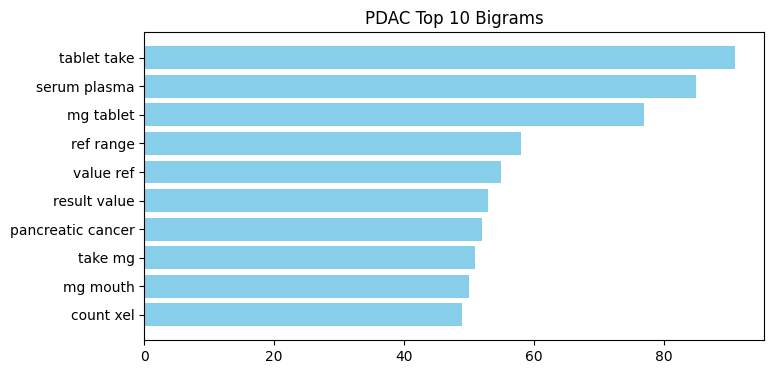

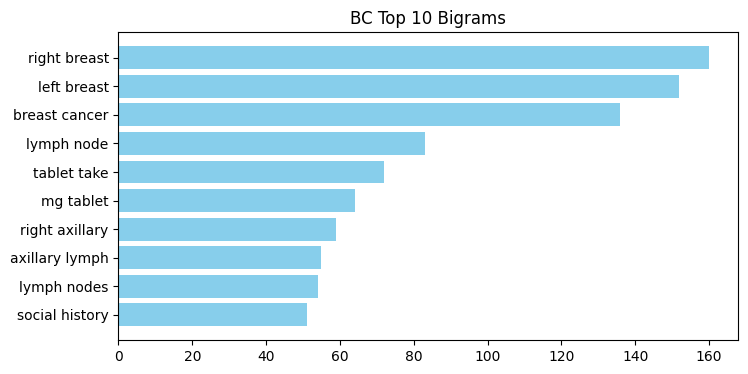

In [38]:
def top_ngrams(docs, n=2, top=10):
    counter = Counter()
    for doc in docs:
        tokens = doc.split()
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i+n])
            counter[ngram] += 1
    return counter.most_common(top)

pdac_bigrams = top_ngrams(pdac_df["clean_note"], n=2, top=10)
print("PDAC Top 10 Bigrams:")
print(pdac_bigrams)

bc_bigrams = top_ngrams(bc_df["clean_note"], n=2, top=10)
print("BC Top 10 Bigrams:")
print(bc_bigrams)

def plot_ngram_counts(ngram_counts, title):
    ngrams, counts = zip(*ngram_counts)
    ngrams = [" ".join(ng) for ng in ngrams]
    plt.figure(figsize=(8,4))
    plt.barh(ngrams, counts, color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

plot_ngram_counts(pdac_bigrams, "PDAC Top 10 Bigrams")
plot_ngram_counts(bc_bigrams, "BC Top 10 Bigrams")

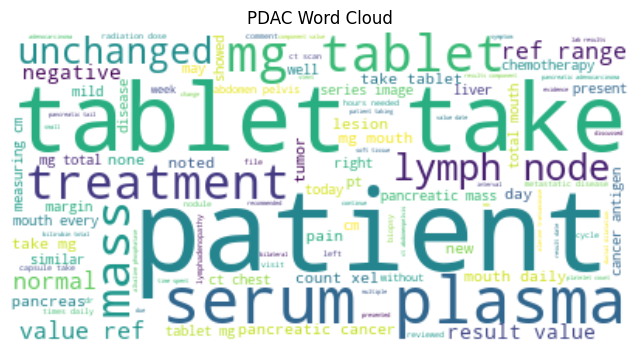

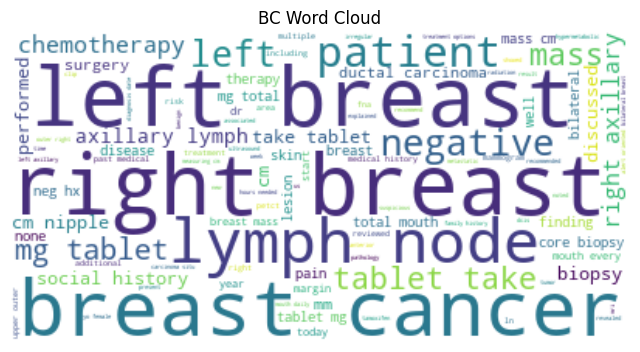

In [39]:
def plot_wordcloud(text, title):
    wc = WordCloud(background_color="white", max_words=100).generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# PDAC
pdac_text = " ".join(pdac_df["clean_note"].tolist())
plot_wordcloud(pdac_text, "PDAC Word Cloud")

# BC
bc_text = " ".join(bc_df["clean_note"].tolist())
plot_wordcloud(bc_text, "BC Word Cloud")